<a href="https://colab.research.google.com/github/tania1901/machine_learning/blob/main/%D0%A1%D0%B5%D0%B3%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D1%86%D0%B8%D1%8F_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка библиотек downloading libraries

In [ ]:
import numpy as np
import PIL as p
from PIL import ImageOps, Image
import matplotlib.pyplot as plt
import keras
import keras.callbacks as cb
from keras import models, utils, layers, losses, optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Reshape, MaxPooling2D, Conv2D, Conv1D, MaxPooling1D, Dropout,    BatchNormalization, Activation,Conv2DTranspose
import time
import random

from keras.datasets import mnist
import cv2


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

img_rows,img_cols=28,28

11493376/11490434 [==============================] - 0s 0us/step


#Подпрограммы для работы subprogrammes for working

In [ ]:
#show small canvas
def show_x(x, y):
    plt.imshow(x.reshape(28,28), cmap = 'gray')
    plt.axis('off')
    plt.title(y)
    plt.show()

#show large canvas
def show(x):
    plt.imshow(x.reshape(256,256), cmap = 'gray')
    plt.axis('off')
    plt.show()


datagen = ImageDataGenerator(
    width_shift_range = 0.1, # Случайный горизонтальный сдвиг изображения
    height_shift_range = 0.1 # Случайный вертикальный сдвиг изображения
    )

'''print(y_test[1])
show_x(x_test[1],_)
print(x_test[1])
'''

'print(y_test[1])\nshow_x(x_test[1],_)\nprint(x_test[1])\n'

# Преобразование данных changing dataset

In [ ]:
'''x_train = x_train.reshape(x_train.shape[0], 28, 28,1)
x_test = x_test.reshape(x_test.shape[0], 28, 28,1)

# convert from int to float
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test=x_test/255.0
print(y_train.shape)'''
'''show_x(x_train0[0],_,28,28)'''


(60000, 10)


'show_x(x_train0[0],_,28,28)'

#Создание тестового и проверочного множеств (заголовок)

# Создание полотна creating large canvas

In [ ]:
def add(canvas,img,i,j):
  for ii in range(28):
    for jj in range(28):
      canvas[ii+i][jj+j]+=img[ii][jj]
  return canvas 

#имеем массив 
def Images(x_t,y_t,x_mnoz,y_mnoz,z):#количество изображений каждой метки
  #print('--------------начало-----------------------------------')
  for i in range(z):
    print('-------------проход  по меткам---------------------итерация ', i)
    for j in range (1):
      print('------------выполняется метка----------------------- метка ', j)
      blank_image = np.zeros((256,256,1),dtype='float32')
      black=np.zeros((256,256,1),dtype='float32')
      #show(blank_image)  
      #res=0
      jj=0
      rs=np.random.randint(5,81)#сколько картинок на холсте - рудимент
      for l in range (9):
        '''if rs<=0:
          break'''
        n = np.random.randint(1,9)#число заполненных ячеек в строке
        rs=rs-n
        arr=[s for s in range(9)]#адреса ячейки для заполнения
        for q in range (n):
          #res+=1
          i = random.choice (arr)
          arr.remove(i)
          si=random.randrange(-2,5)
          sj = random.randrange(-2,5)
          while True:
            k = np.random.randint(len(x_mnoz))
            
            if j==np.argmax(y_mnoz[k]):
              print('-------------ПРОВЕРКА------------------------------------')
              print('------------МЕТКА x_mnozh[k] y[k]----------------------')
              print(j)
              #show_x(x_mnoz[k],_)
              print(y_mnoz[k])
              print('-------------ПРОВЕРКА ЗАВЕРШЕНА------------------------------------')
              break
          x_gen=x_mnoz[k]
          #print(x_gen.shape)
          blank_image=add(blank_image,x_gen,i*27+si,sj+jj)
          
        jj+=27
        
      print('--------------формирование изображения закончено-------')

      x_t.append(blank_image)
      
      
      y=[]
      for u in range(10):
        if j!=u:
          y.append(black)
        else:
          y.append(blank_image)
      y_t.append(y)
      '''print(len(y_t))
  print(len(y_t))'''
  return x_t,y_t



#Новое


In [ ]:
def add(canvas,img,i,j):
  for ii in range(28):
    for jj in range(28):
      canvas[ii+i][jj+j]+=img[ii][jj]
  return canvas 
# ----------------------------------------------------
fx_train = 'dataTrain.bin'
fy_train = 'labelsTrain.bin'
fx_test = 'dataTest.bin'
fy_test = 'labelsTest.bin'

def loadBinData(pathToData, img_rows, img_cols):
    print('Загрузка данных из двоичных файлов...')
    with open(pathToData + 'dataTrain.bin', 'rb') as read_binary:
        x_tr = np.fromfile(read_binary, dtype=np.uint8)
    with open(pathToData + 'labelsTrain.bin', 'rb') as read_binary:
        y_tr = np.fromfile(read_binary, dtype=np.uint8)
    with open(pathToData + 'dataTest.bin', 'rb') as read_binary:
        x_ts = np.fromfile(read_binary, dtype=np.uint8)
    with open(pathToData + 'labelsTest.bin', 'rb') as read_binary:
        y_ts = np.fromfile(read_binary, dtype=np.uint8)
    # Преобразование целочисленных данных в float32 и нормализация; данные лежат в диапазоне [0.0, 1.0]
    x_tr = np.array(x_tr, dtype='float32') / 255
    x_ts = np.array(x_ts, dtype='float32') / 255
    print(x_ts.shape)

    x_train_shape_0 = int(x_tr.shape[0] / (256 * 256))
    x_test_shape_0 = int(x_ts.shape[0] / (256 * 256))

    x_tr = x_tr.reshape(x_train_shape_0, 256, 256, 1)  # 1 - оттенок серого цвета
    print(x_train_shape_0)
    x_ts = x_ts.reshape(x_test_shape_0, 256, 256, 1)
    print(x_test_shape_0)

    # Преобразование в категориальное представление
    print('Преобразуем массивы меток в категориальное представление')
    y_tr = y_tr.reshape(x_train_shape_0, 10, 256, 256, 1)
    y_ts = y_ts.reshape(x_test_shape_0, 10, 256, 256, 1)
    return x_tr, y_tr, x_ts, y_ts
# ----------------------------------------------------

def Images(z,x_t,y_t,x_mnoz,y_mnoz):#количество изображений каждой метки
  #print('--------------начало-----------------------------------')
  for i in range(z):
    print('-------------проход  по меткам---------------------итерация ', i)
    for j in range (1):
      print('------------выполняется метка----------------------- метка ', j)
      blank_image = np.zeros((256,256,1),dtype=np.uint8)#'float32')
      black=np.zeros((256,256,1),dtype=np.uint8)
      #show(blank_image)  
      #res=0
      jj=0
      rs=np.random.randint(5,81)#сколько картинок на холсте - рудимент
      for l in range (9):
        '''if rs<=0:
          break'''
        n = np.random.randint(1,9)#число заполненных ячеек в строке
        rs=rs-n
        arr=[s for s in range(9)]#адреса ячейки для заполнения
        for q in range (n):
          #res+=1
          i = random.choice (arr)
          arr.remove(i)
          si=random.randrange(-2,5)
          sj = random.randrange(-2,5)
          while True:
            k = np.random.randint(len(x_mnoz))
            
            if j==(y_mnoz[k]):
              print('-------------ПРОВЕРКА------------------------------------')
              print('------------МЕТКА x_mnozh[k] y[k]----------------------')
              print(j)
              #show_x(x_mnoz[k],_)
              print(y_mnoz[k])
              print('-------------ПРОВЕРКА ЗАВЕРШЕНА------------------------------------')
              break
          x_gen=x_mnoz[k]
          #print(x_gen.shape)
          blank_image=add(blank_image,x_gen,i*27+si,sj+jj)
          
        jj+=27
        
      print('--------------формирование изображения закончено-------')

      x_t.write(blank_image)
      
      
      y=[]
      for u in range(10):
        if j!=u:
          y.append(black)
        else:
          y.append(blank_image)
      y_t.write(np.array(y))
       
    

def Make_bin_files(n,n1):

  fx_ts = open('dataTest.bin', 'wb')
  fy_ts = open('labelsTest.bin', 'wb')
  fx_tr = open('dataTrain.bin', 'wb')
  fy_tr = open('labelsTrain.bin', 'wb')

  Images(n,fx_tr,fy_tr,x_train,y_train)
  Images(n1,fx_ts,fy_ts,x_test,y_test)

  fx_tr.close()
  fy_tr.close()
  fx_ts.close()
  fy_ts.close()

  print('Сформированы файлы')

In [ ]:
Make_bin_files(50,50)


In [ ]:
x_tr, y_tr, x_ts, y_ts = loadBinData('', 256, 256)


In [ ]:
y_tr=list(y_tr)

In [ ]:
print(y_tr)

#Рудиментарные


In [ ]:
'''x_ts=[]
y_ts=[]
x_ts,y_ts=Images(x_ts,y_ts,x_test,y_test,10)
for i in range(len(x)):
  show(x[i])'''


In [ ]:
'''print(len(x),len(y))
print(len(y[0]))

for i in range(len(y)):
  for j in range (10):
    show(y[i][j])'''

In [ ]:
'''#прошлая версия
def Images(x_mnoz,y_mnoz,k):#количество изображений каждой метки
  
  blank_image = p.Image.new('L', (256, 256), 0)
  res=0
  jj=0
  rs=np.random.randint(5,81)
  for q in range (9):
      n = np.random.randint(1,9)#число заполненных ячеек в строке
      rs=rs-n
      arr=[s for s in range(9)]#адресс ячейки для заполнения
      for q in range (n):
        res+=1
        i = random.choice (arr)
        arr.remove(i)
        si=random.randrange(-2,5)
        sj = random.randrange(-2,5)
        k = np.random.randint(len(x_batch))
        x_gen=x_batch[k][0][0]
        x_gen = x_gen.astype('float32')
        im = p.Image.fromarray(x_gen.reshape(28,28))
        im=ImageOps.grayscale(im)
        blank_image.paste(im.convert('L'), (i*27+si,sj+jj), im)
      jj+=27  
  return blank_image'''

# Обучение нейронки learning 


In [ ]:
callbacks = []
callbacks.append(cb.EarlyStopping(monitor = 'val_accuracy', patience = 15))
img_rows = img_cols = 28
num_classes = 10
epochs = 60

pathToHistory = ''
suff = '.txt'

# Имена файлов, в которые сохраняется история обучения
fn_loss = pathToHistory + 'loss_' + suff
fn_acc = pathToHistory + 'acc_' + suff
fn_val_loss = pathToHistory + 'val_loss_' + suff
fn_val_acc = pathToHistory + 'val_acc_' + suff

# Вывод графиков
def one_plot(n, y_lb, loss_acc, val_loss_acc):
    plt.subplot(1, 2, n)
    if n == 1:
        lb, lb2 = 'loss', 'val_loss'
        yMin = 0
        yMax = 1.05 * max(max(loss_acc), max(val_loss_acc))
    else:
        lb, lb2 = 'acc', 'val_acc'
        yMin = min(min(loss_acc), min(val_loss_acc))
        yMax = 1.0
    plt.plot(loss_acc, color='r', label=lb, linestyle='--')
    plt.plot(val_loss_acc, color='g', label=lb2)
    plt.ylabel(y_lb)
    plt.xlabel('Эпоха')
    plt.ylim([0.95 * yMin, yMax])
    plt.legend()


# Определение формы входных данных
'''input_shape = (256, 256,1)
inp = Input(shape = input_shape)
x = inp

x = MaxPooling2D(pool_size = 4, strides = 2, padding = 'same')(x)
x = Dropout(rate=0.3, noise_shape=None, seed=None)(x)
output= Conv2D(10, kernel_size = 4, padding = 'same', activation = 'relu')(x)
model = Model(inputs = inp, outputs = output)
model.summary()
model.compile(optimizer = 'adam', loss = 'crossentropy', metrics = ['accuracy'])'''




# Обучение нейронной сети
'''
x_train0 = x_train.astype('float32')
x_test0 = x_test.astype('float32')
x_train0 = x_train0 / 255.0
x_test0=x_test0/255.0'''

epochs = 160

start = time.time()
history = model.fit(x_tr, y_tr, batch_size=128, epochs=epochs, verbose=2, validation_data=(x_ts, y_ts),callbacks = callbacks)
print('Время  обучения:', time.time() - start)

fn_model = 'model.h5'
print('Модель сохранена в файле', fn_model)
model.save(fn_model)

# Запись истории обучения в текстовые файлы
history = history.history
with open(fn_loss, 'w') as output:
    for val in history['loss']: output.write(str(val) + '\n')
with open(fn_acc, 'w') as output:
    for val in history['accuracy']: output.write(str(val) + '\n')
with open(fn_val_loss, 'w') as output:
    for val in history['val_loss']: output.write(str(val) + '\n')
with open(fn_val_acc, 'w') as output:
    for val in history['val_accuracy']: output.write(str(val) + '\n')

# Вывод графиков обучения
plt.figure(figsize=(9, 4))
plt.subplots_adjust(wspace=0.5)
one_plot(1, 'Потери', history['loss'], history['val_loss'])
one_plot(2, 'Точность', history['accuracy'], history['val_accuracy'])
plt.suptitle('Потери и точность')
plt.show()


TypeError: ignored

In [ ]:
callbacks = []
callbacks.append(cb.EarlyStopping(monitor = 'val_accuracy', patience = 15))
history=model.fit_generator(datagen.flow(x_train0, y_train, batch_size=128), epochs=epochs, verbose=2,validation_data=(x_test0, y_test),callbacks = callbacks)


history = history.history
with open(fn_loss, 'w') as output:
    for val in history['loss']: output.write(str(val) + '\n')
with open(fn_acc, 'w') as output:
    for val in history['accuracy']: output.write(str(val) + '\n')
with open(fn_val_loss, 'w') as output:
    for val in history['val_loss']: output.write(str(val) + '\n')
with open(fn_val_acc, 'w') as output:
    for val in history['val_accuracy']: output.write(str(val) + '\n')
plt.figure(figsize=(9, 4))
plt.subplots_adjust(wspace=0.5)
one_plot(1, 'Потери', history['loss'], history['val_loss'])
one_plot(2, 'Точность', history['accuracy'], history['val_accuracy'])
plt.suptitle('Потери и точность')
plt.show()




In [ ]:
model.save(fn_model) 

In [ ]:
blank_image = p.Image.new('L', (256, 256), 0)
#show(blank_image)

In [ ]:
datagen.fit(x_test) # input is 4-dimensional massive
print('Получаем сгенерированные образы')
x_batch=datagen.flow(x_test, y_test)
print(x_batch[0][0].shape)


print(x_test.shape)

for k in range (len(x_batch)):
  print(k,show_x(x_batch[k][0][0],_,_,_))

In [ ]:
x_batch=datagen.flow(x_test, y_test, batch_size=1)
print(x_batch[0][0])

#Удивительное рядом. бороться - загружать сразу в папки??


In [ ]:
print(show_x(x_batch[0][0][0],y_test,28,28))
print(show_x(x_batch[0][0][0],y_test,28,28))
print(show_x(x_batch[0][0][0],y_test,28,28))
print(show_x(x_batch[0][0][0],y_test,28,28))
print(show_x(x_batch[0][0][0],y_test,28,28))


#Подпрограммы для работы


In [ ]:
def Images():
  blank_image = p.Image.new('L', (256, 256), 0)
  res=0
  jj=0
  rs=np.random.randint(5,81)
  for q in range (9):
      n = np.random.randint(1,9)#число заполненных ячеек в строке
      rs=rs-n
      arr=[s for s in range(9)]#адресс ячейки для заполнения
      for q in range (n):
        res+=1
        i = random.choice (arr)
        arr.remove(i)
        si=random.randrange(-2,5)
        sj = random.randrange(-2,5)
        k = np.random.randint(len(x_batch))
        x_gen=x_batch[k][0][0]
        x_gen = x_gen.astype('float32')
        im = p.Image.fromarray(x_gen.reshape(28,28))
        im=ImageOps.grayscale(im)
        blank_image.paste(im.convert('L'), (i*27+si,sj+jj), im)
      jj+=27  
  return blank_image


In [ ]:
def find(model, zn, img):
    l1=p.Image.new('L', (256, 256), 0)
    for i in range (9):

        for j in range (9):
          cropped = img.crop((i*27, j*27, i*27+28, j*27+28))
          cropped=np.asarray(cropped, dtype='float32')
          cropp=cropped/255.0
          
          cropp=cropp.reshape(1,28,28,1)
          result = model.predict(cropp)[0]
          
          if (np.argmax(result) == zn):
            cropped = cropped.astype('float32')
            im = p.Image.fromarray(cropped.reshape(28,28))
            im=ImageOps.grayscale(im)
            l1.paste(im.convert('L'), (i*27,j*27), im)
    return l1


def img_to_ten(mod,img):
    m=[]
    for i in range (10):
      
      m.append(find(mod,i,img))
      
    return m



In [ ]:

def showing(blank_image,res,name1): 
    fig=plt.figure('Результаты')
    fig.set_size_inches(150, 150)
    plt.subplot(4,5,2)
    plt.imshow(blank_image, cmap='gray')
    plt.title('Исходник',fontsize=120)
    plt.axis('off')
    for k in range(0, len(res)):
        plt.subplot(4, 5, k+6)
        plt.imshow(res[k], cmap='gray')
        plt.title(k,fontsize=120)
        plt.axis('off')
    plt.show()
    fig.savefig('{}'.format(name1), quality = 7000)



#Оболочка для работы

In [ ]:
def working():  
  print('Загрузить изображение?')
  fl=input()
  if fl=='no':
    img=Images()
  else:
    print('Введите файл загрузки')
    name=input()
    img=Image.open('{}.png'.format(name))
    img=img.convert('L')
  model = keras.models.load_model('model.h5')
  res=img_to_ten(model,img)
  print('Сохранить результат как файл...')
  name1=input()  
  showing(img,res,name1)
  


Загрузить изображение?
Сохранить результат как файл...


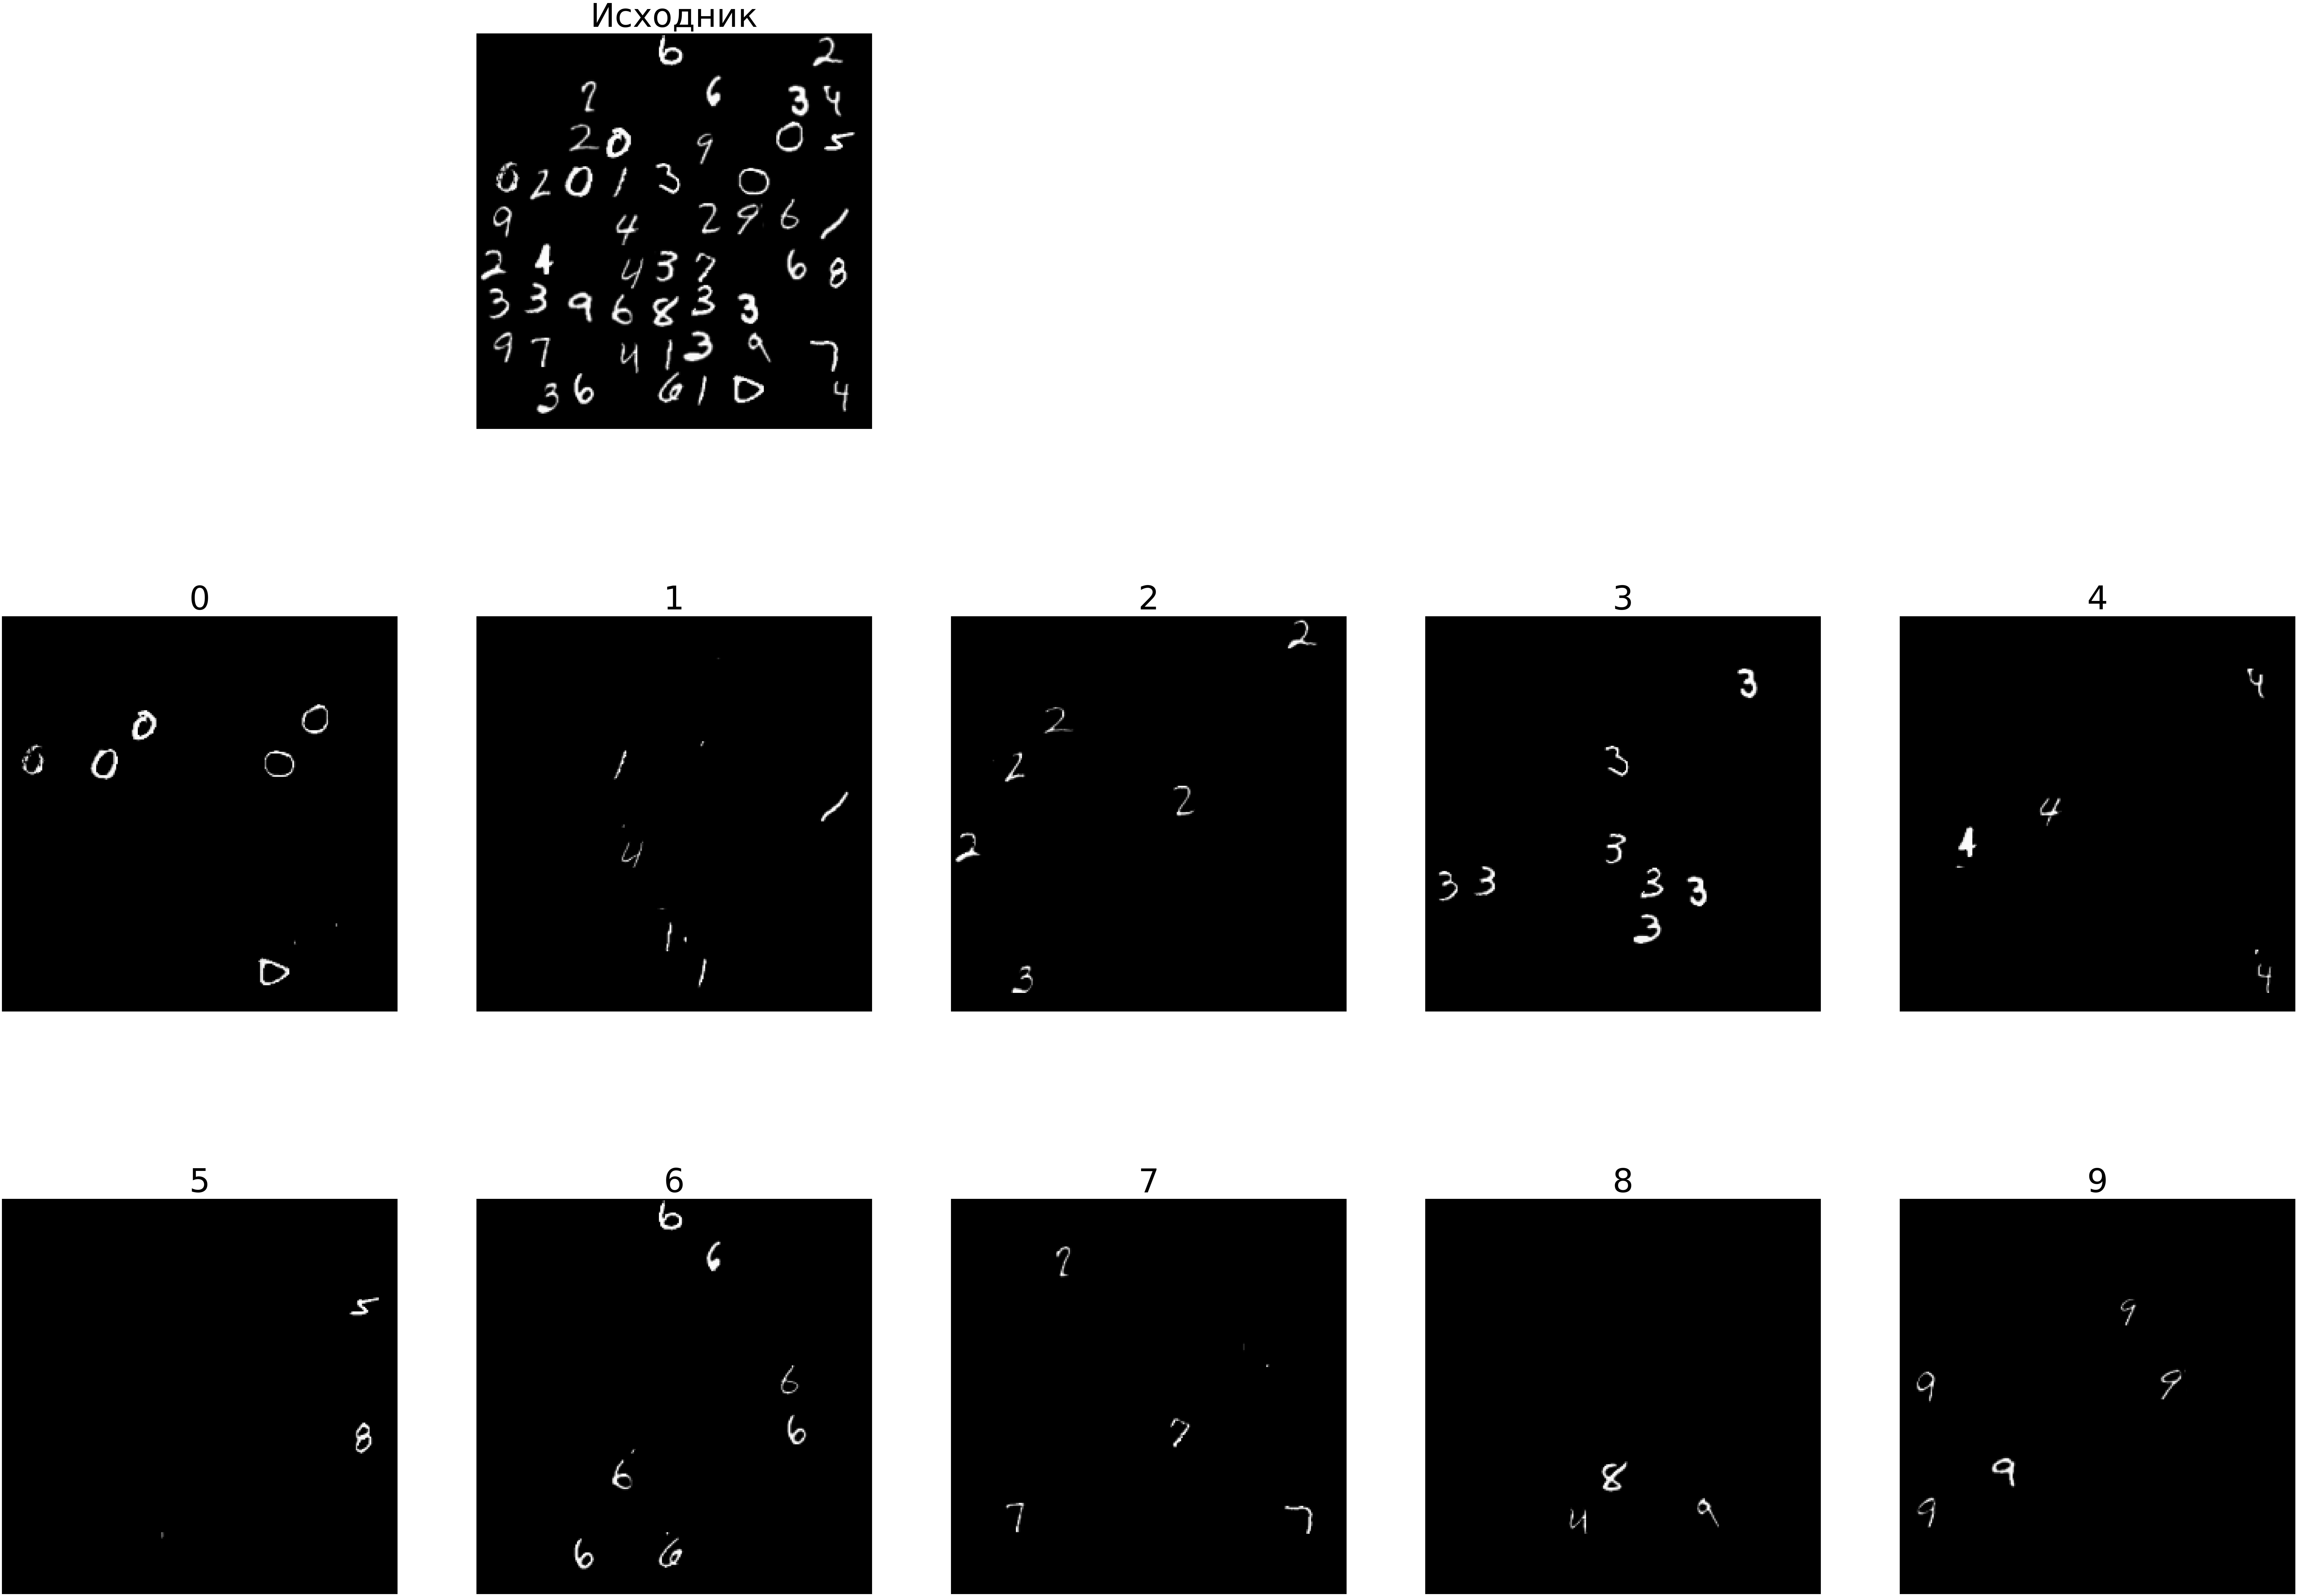

Загрузить изображение?
Сохранить результат как файл...


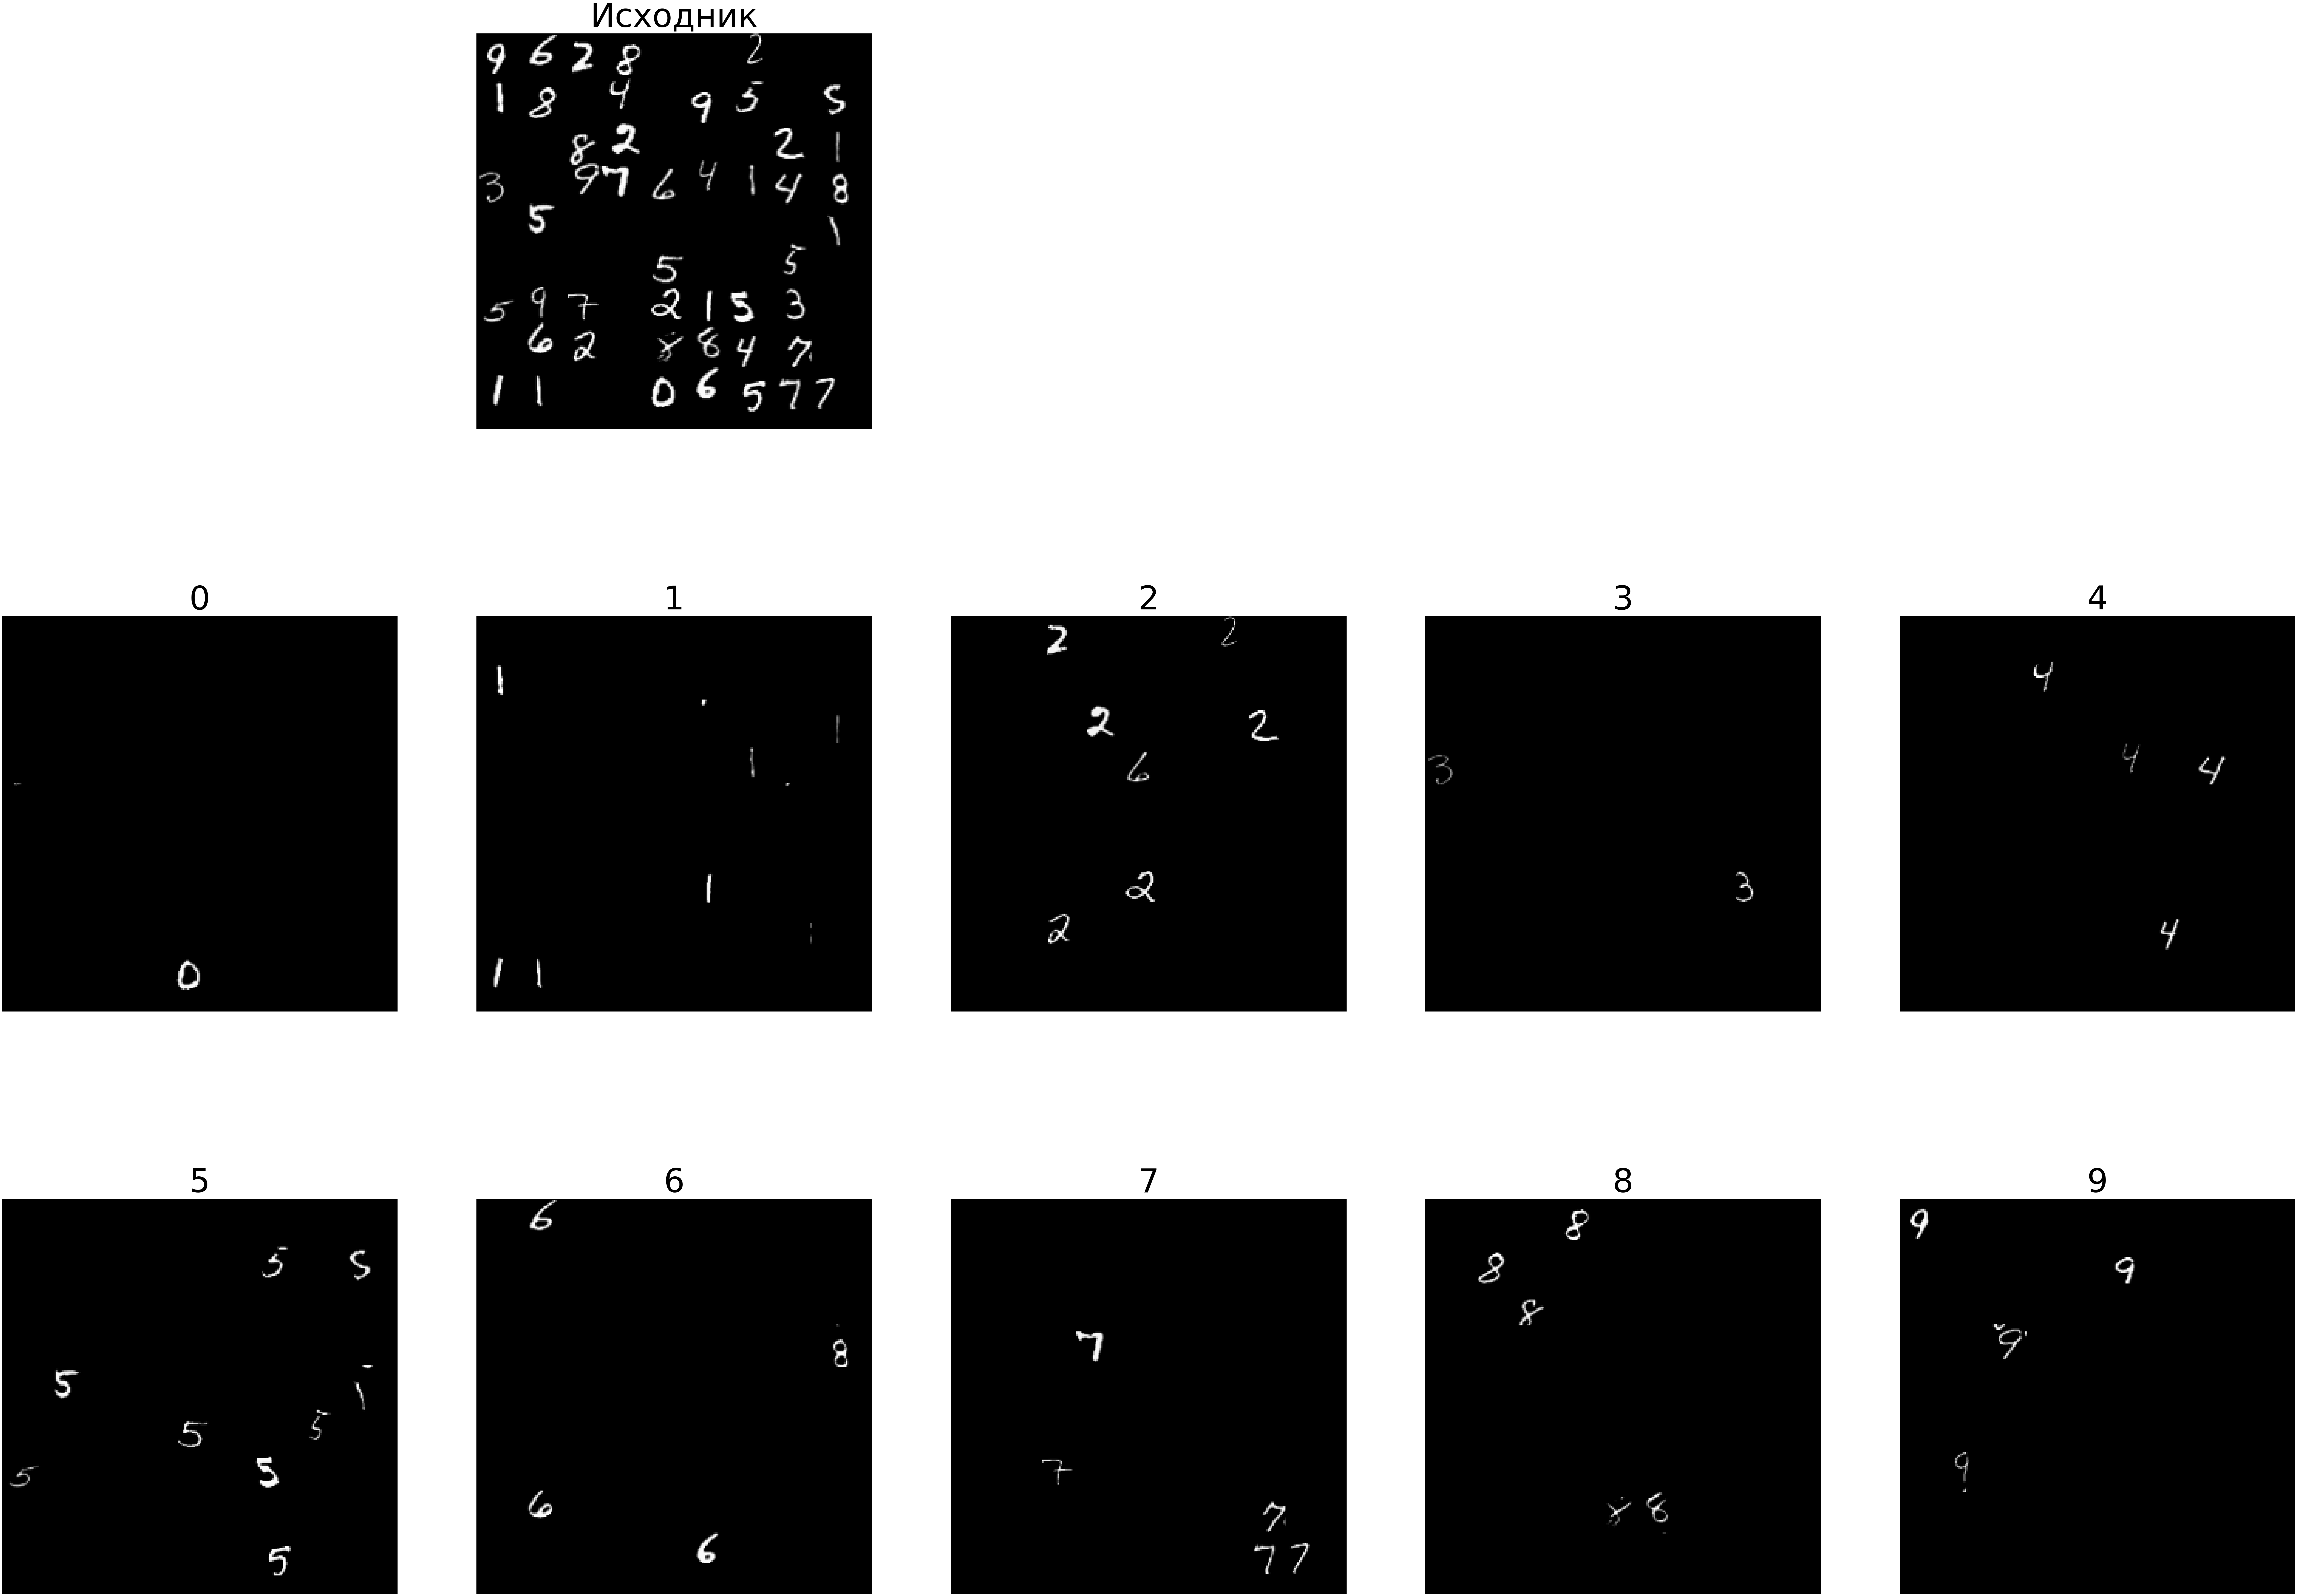

Загрузить изображение?
Сохранить результат как файл...


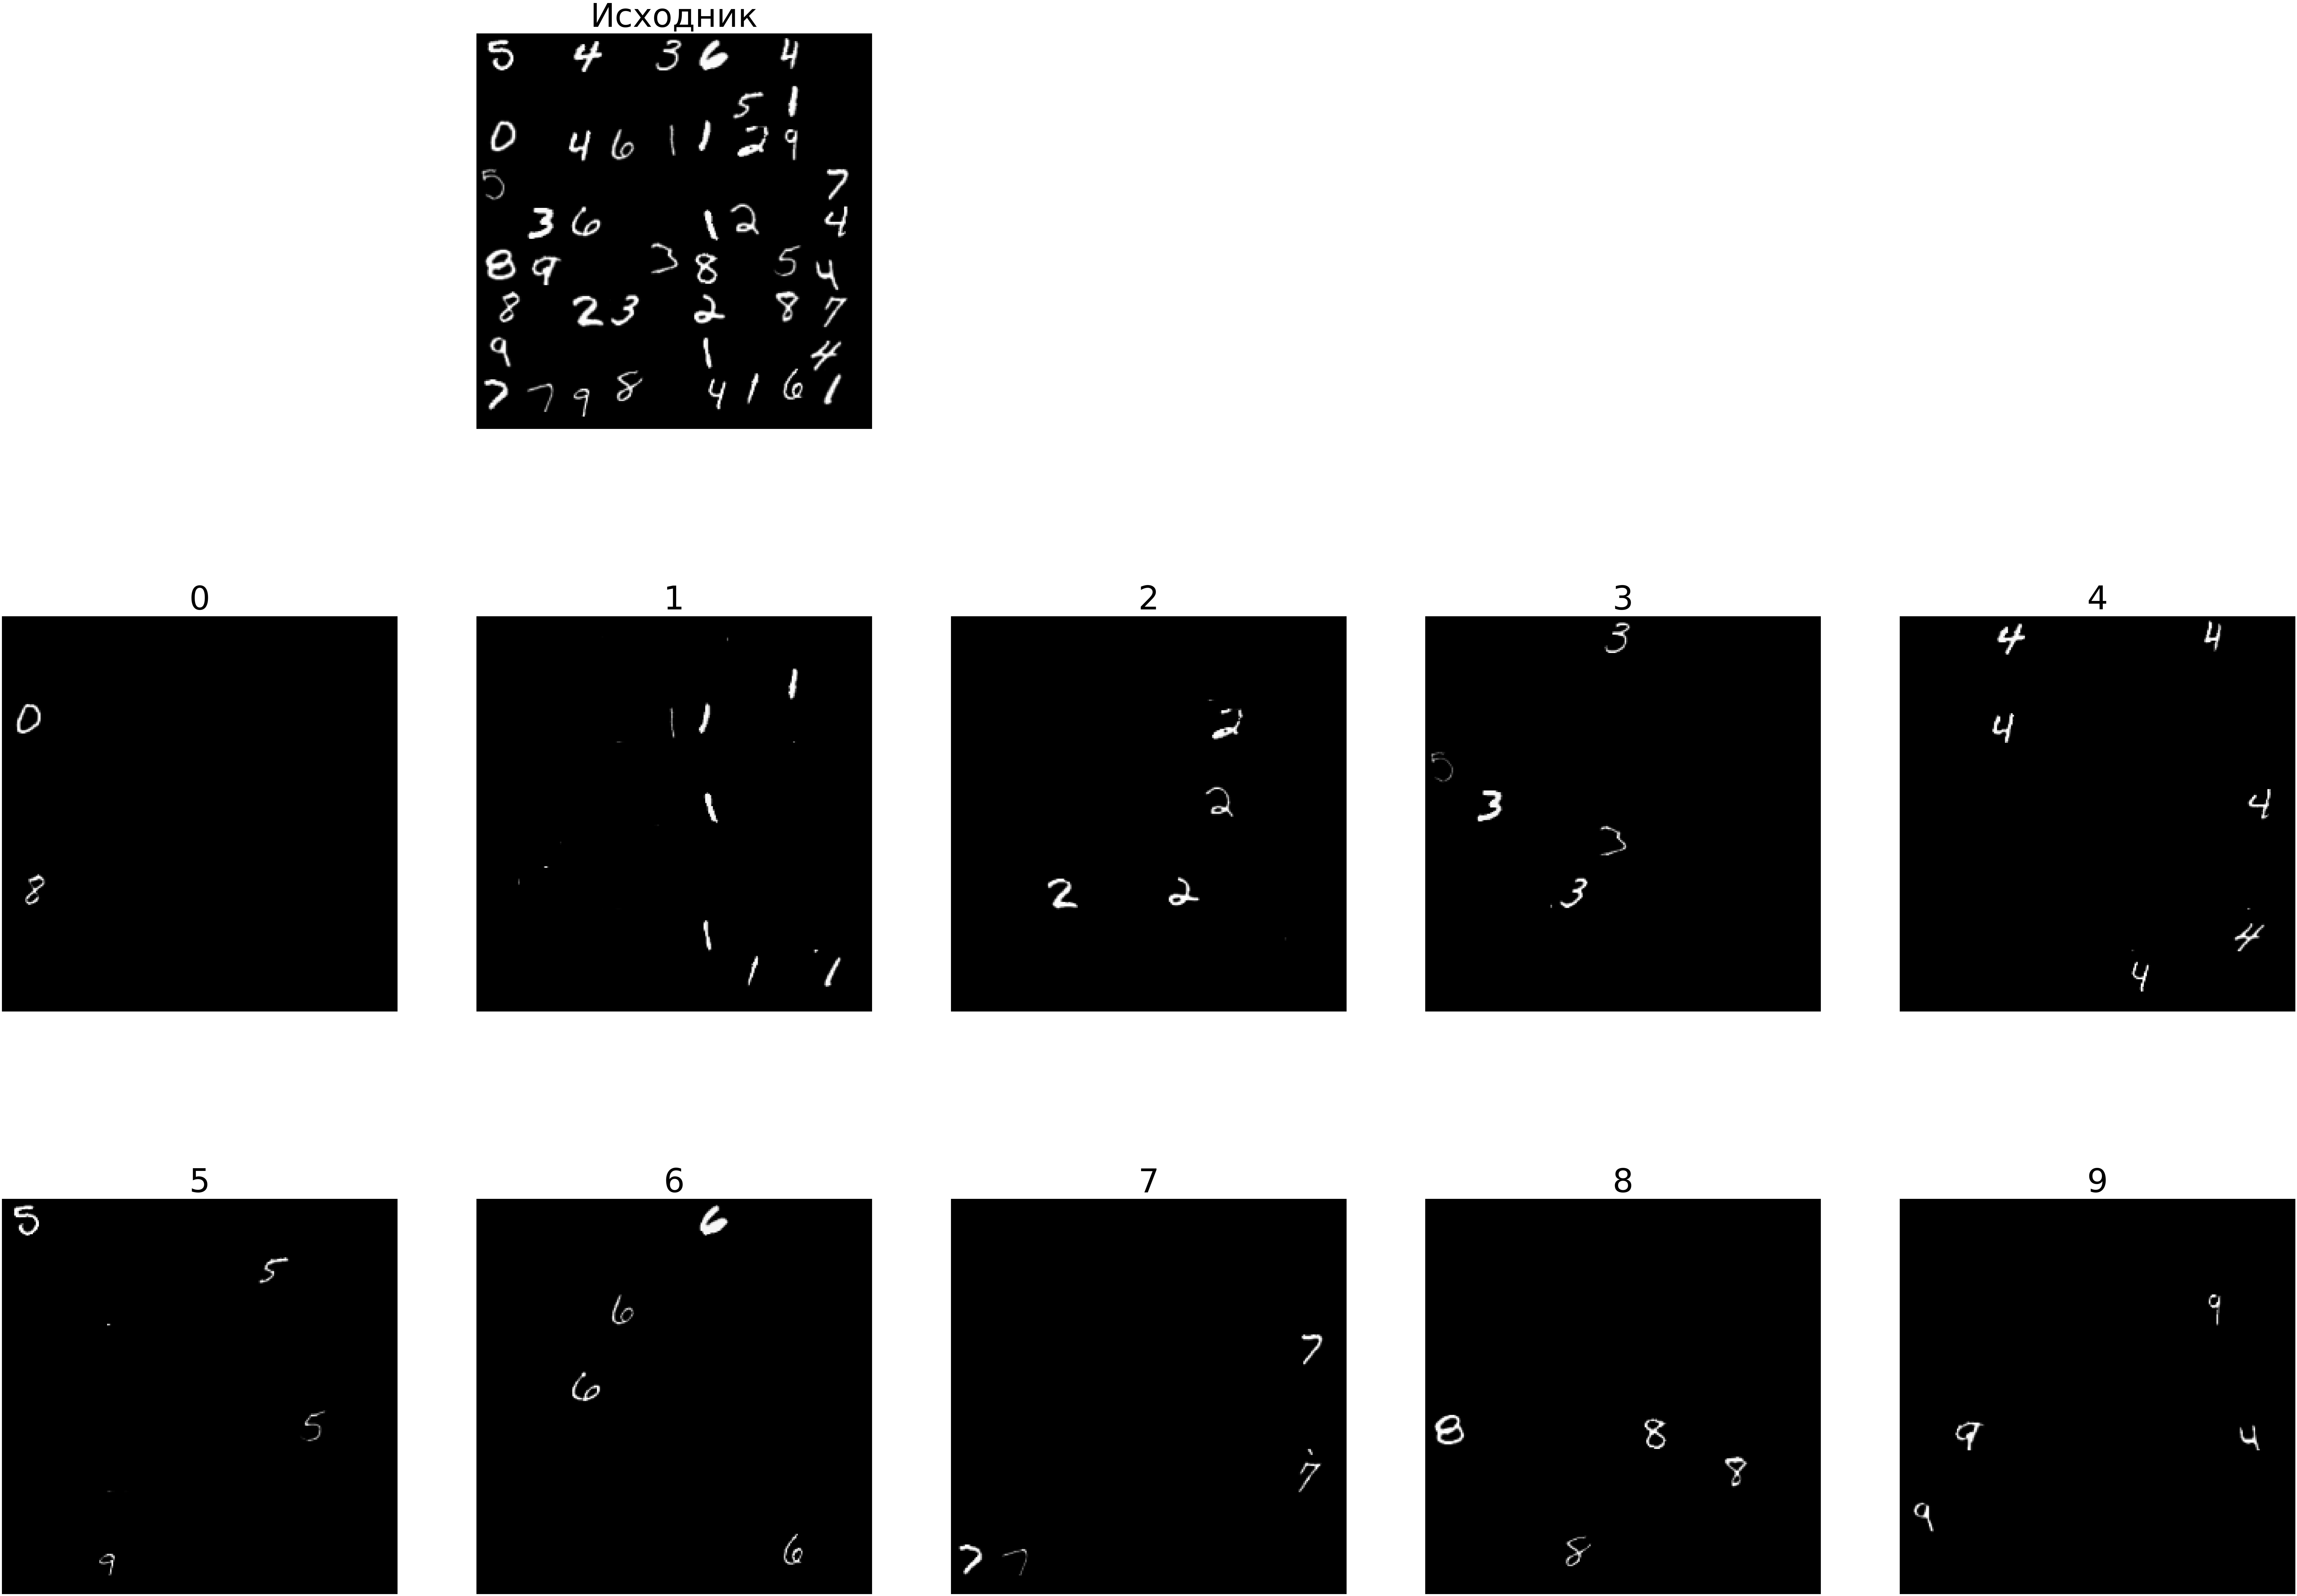

Загрузить изображение?
Сохранить результат как файл...


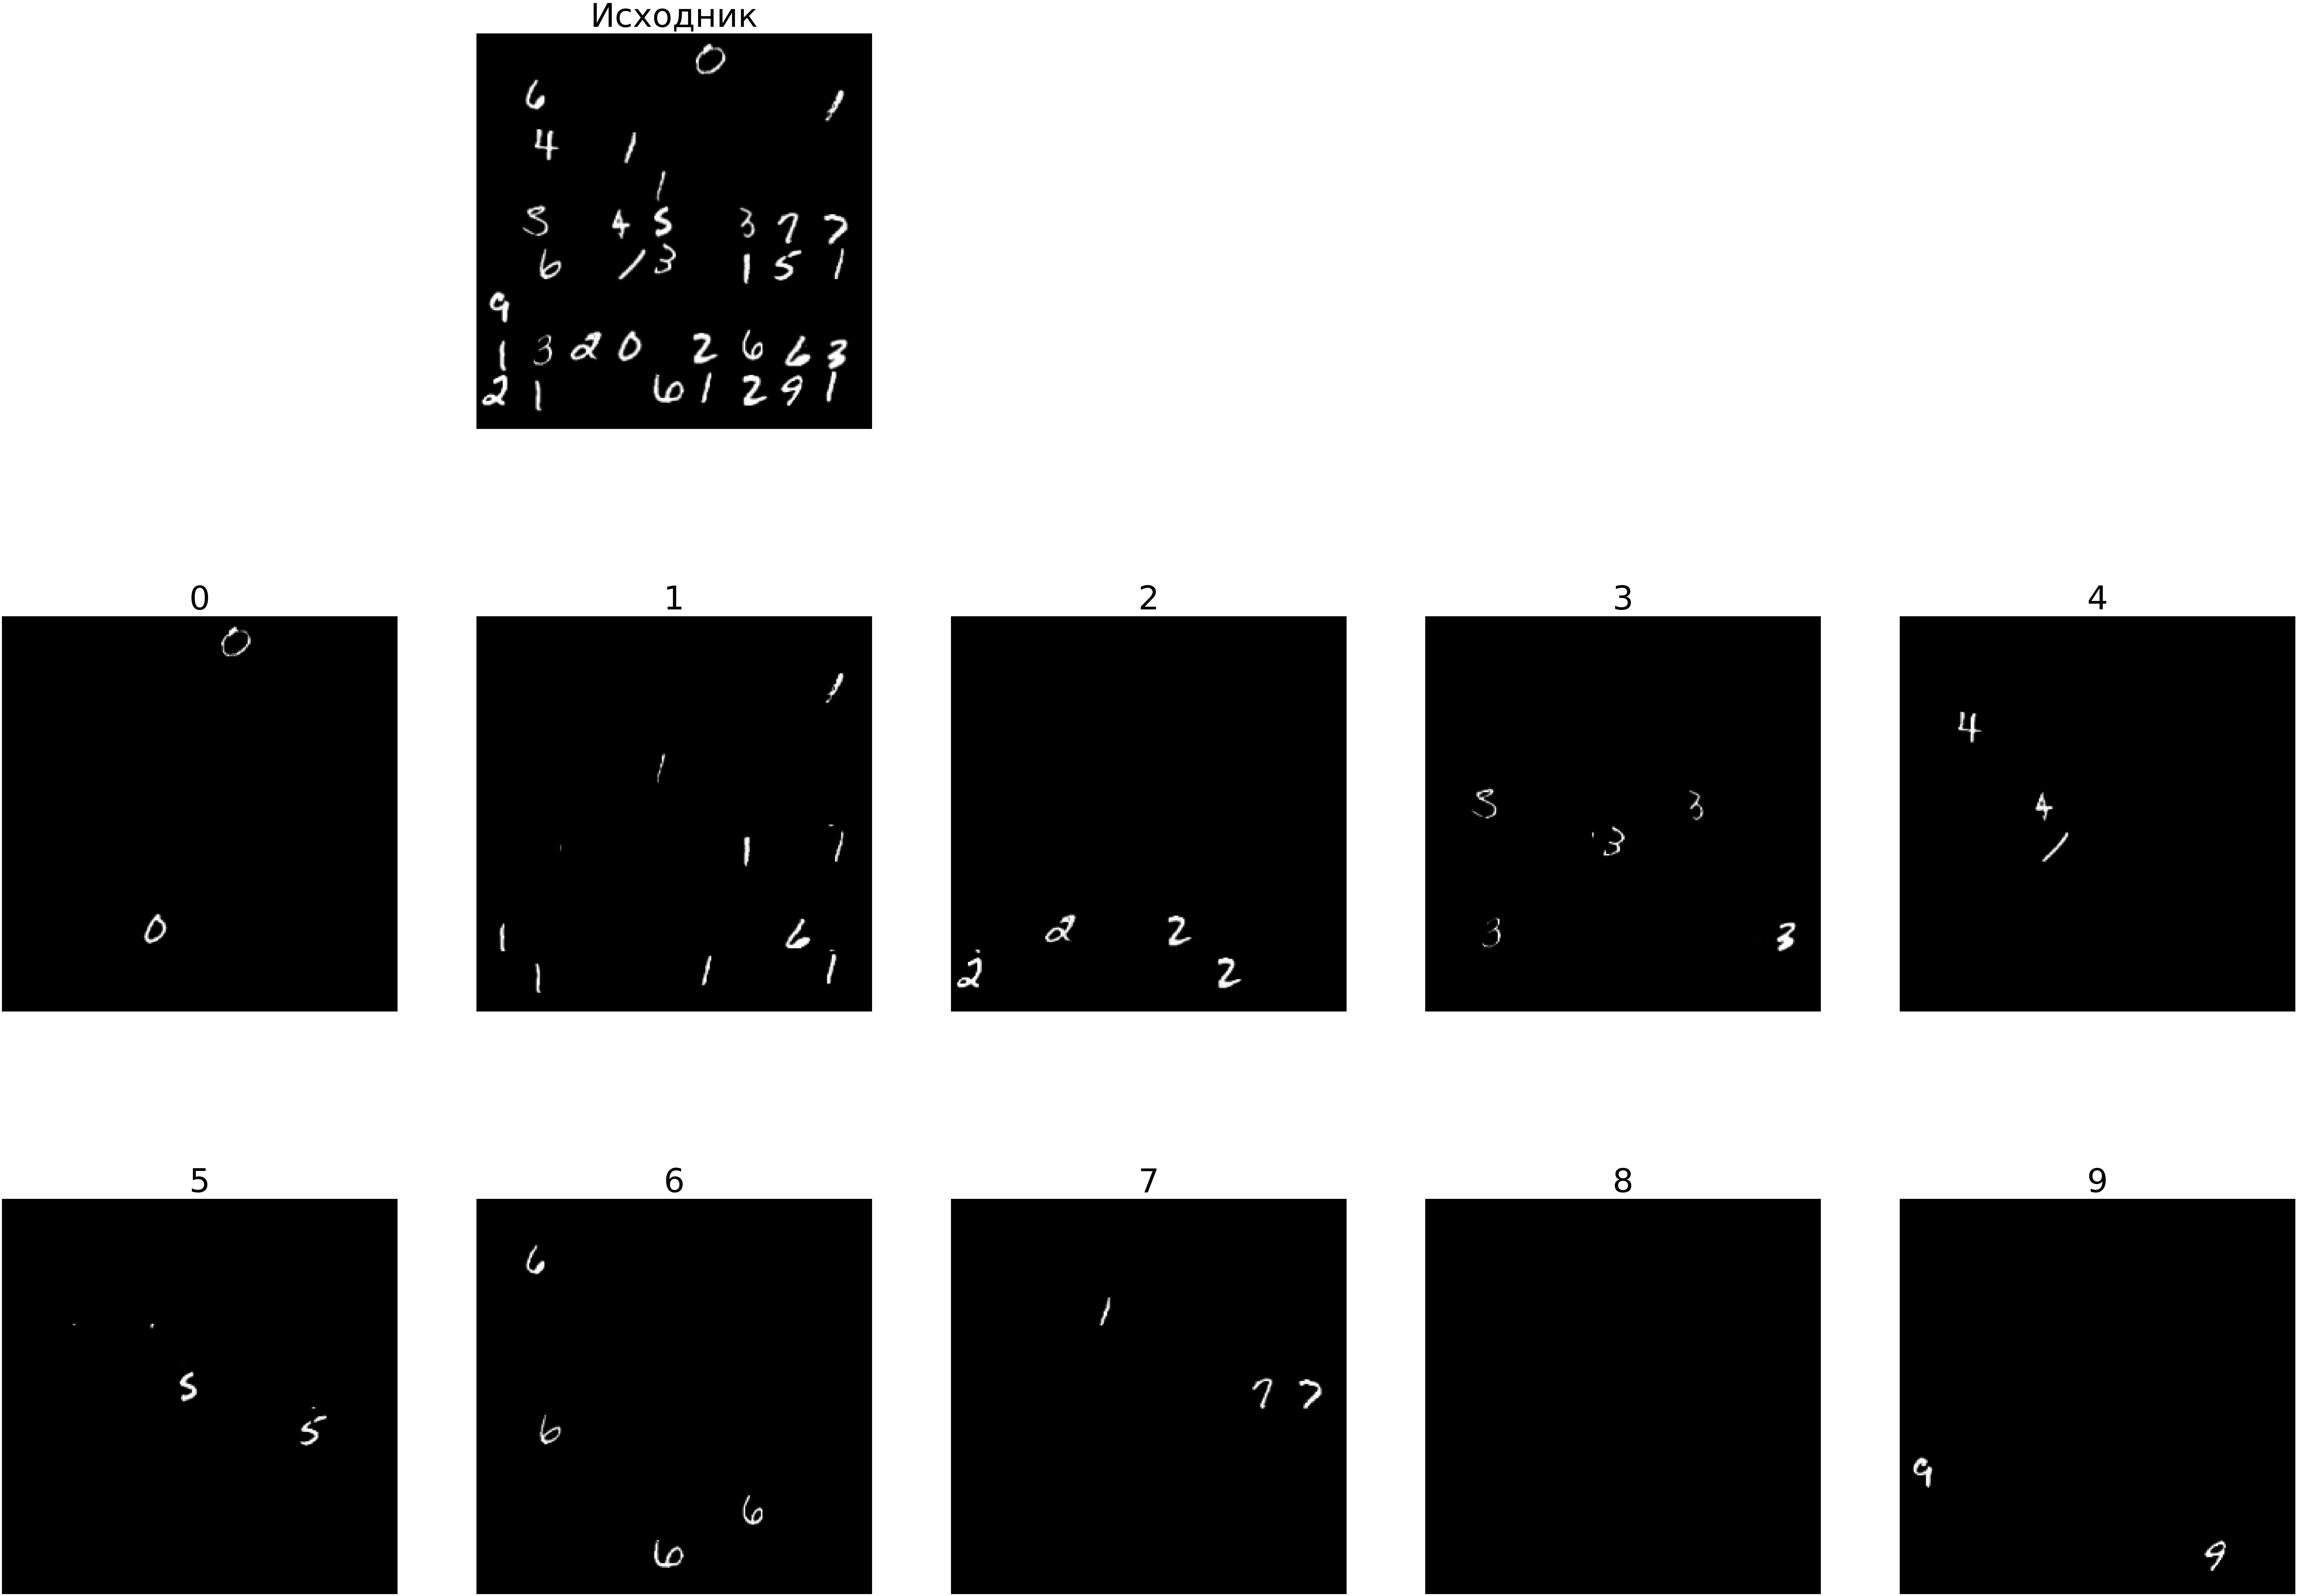

Загрузить изображение?
Сохранить результат как файл...


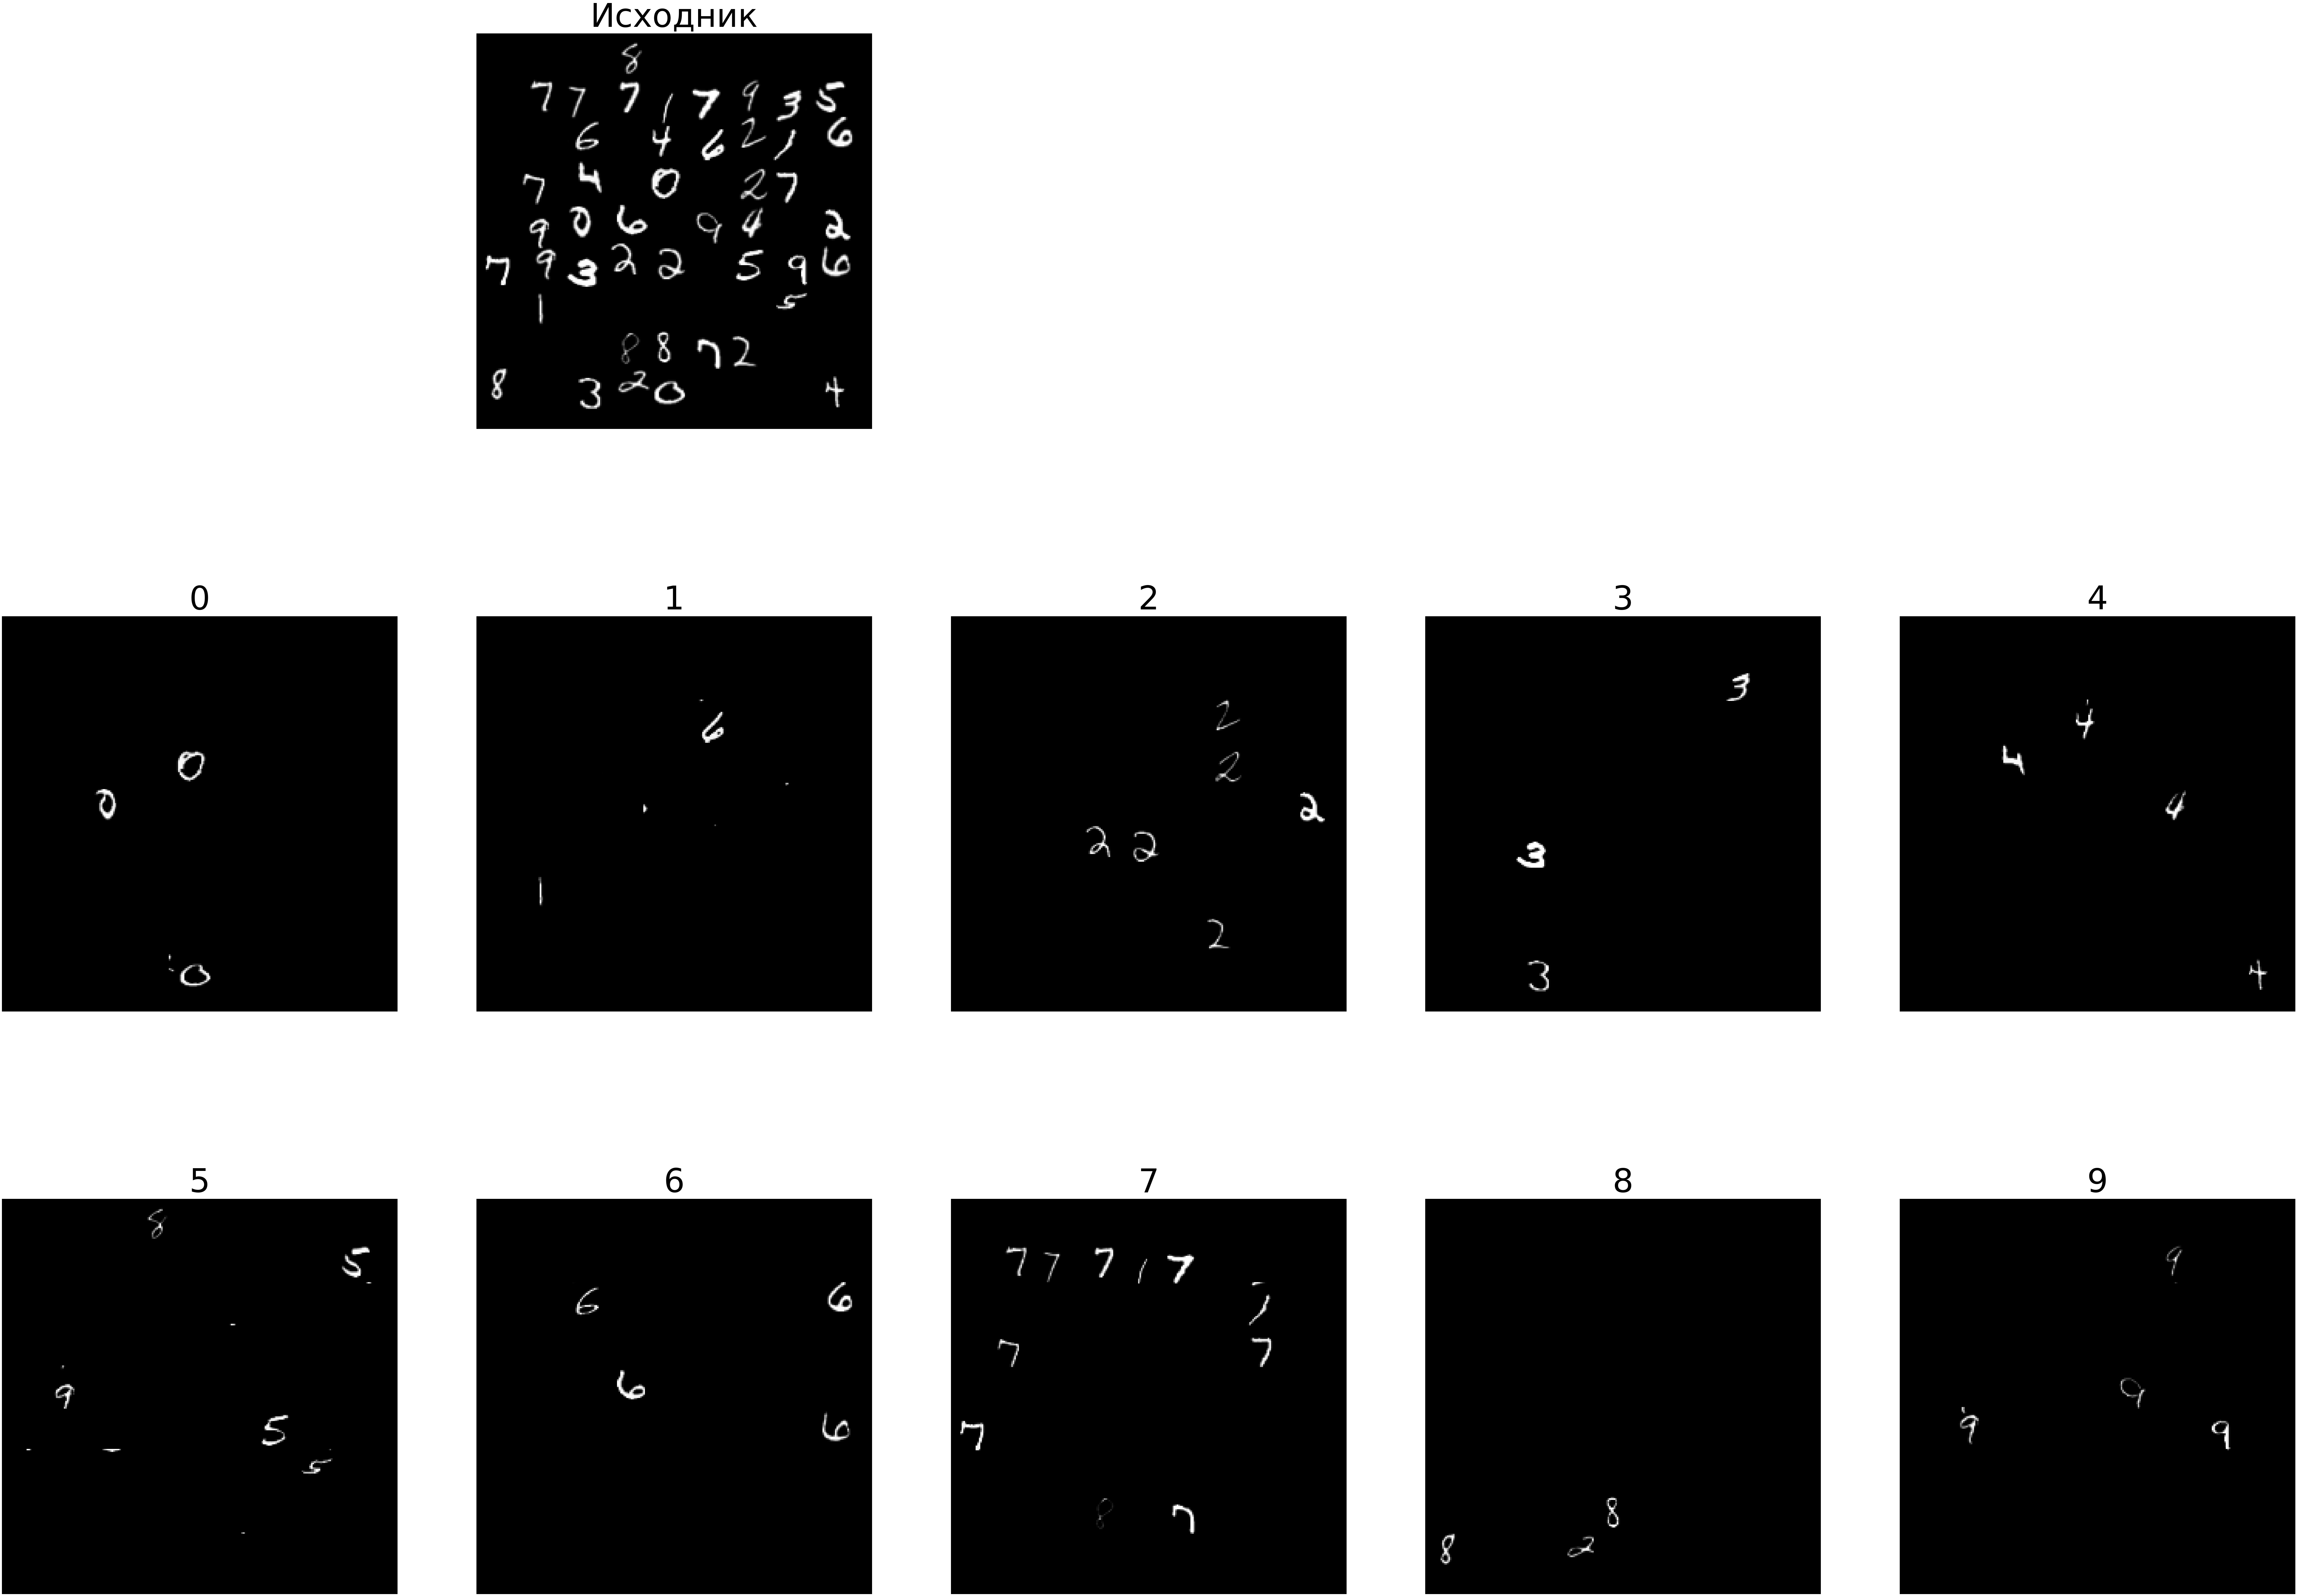

Загрузить изображение?
Сохранить результат как файл...


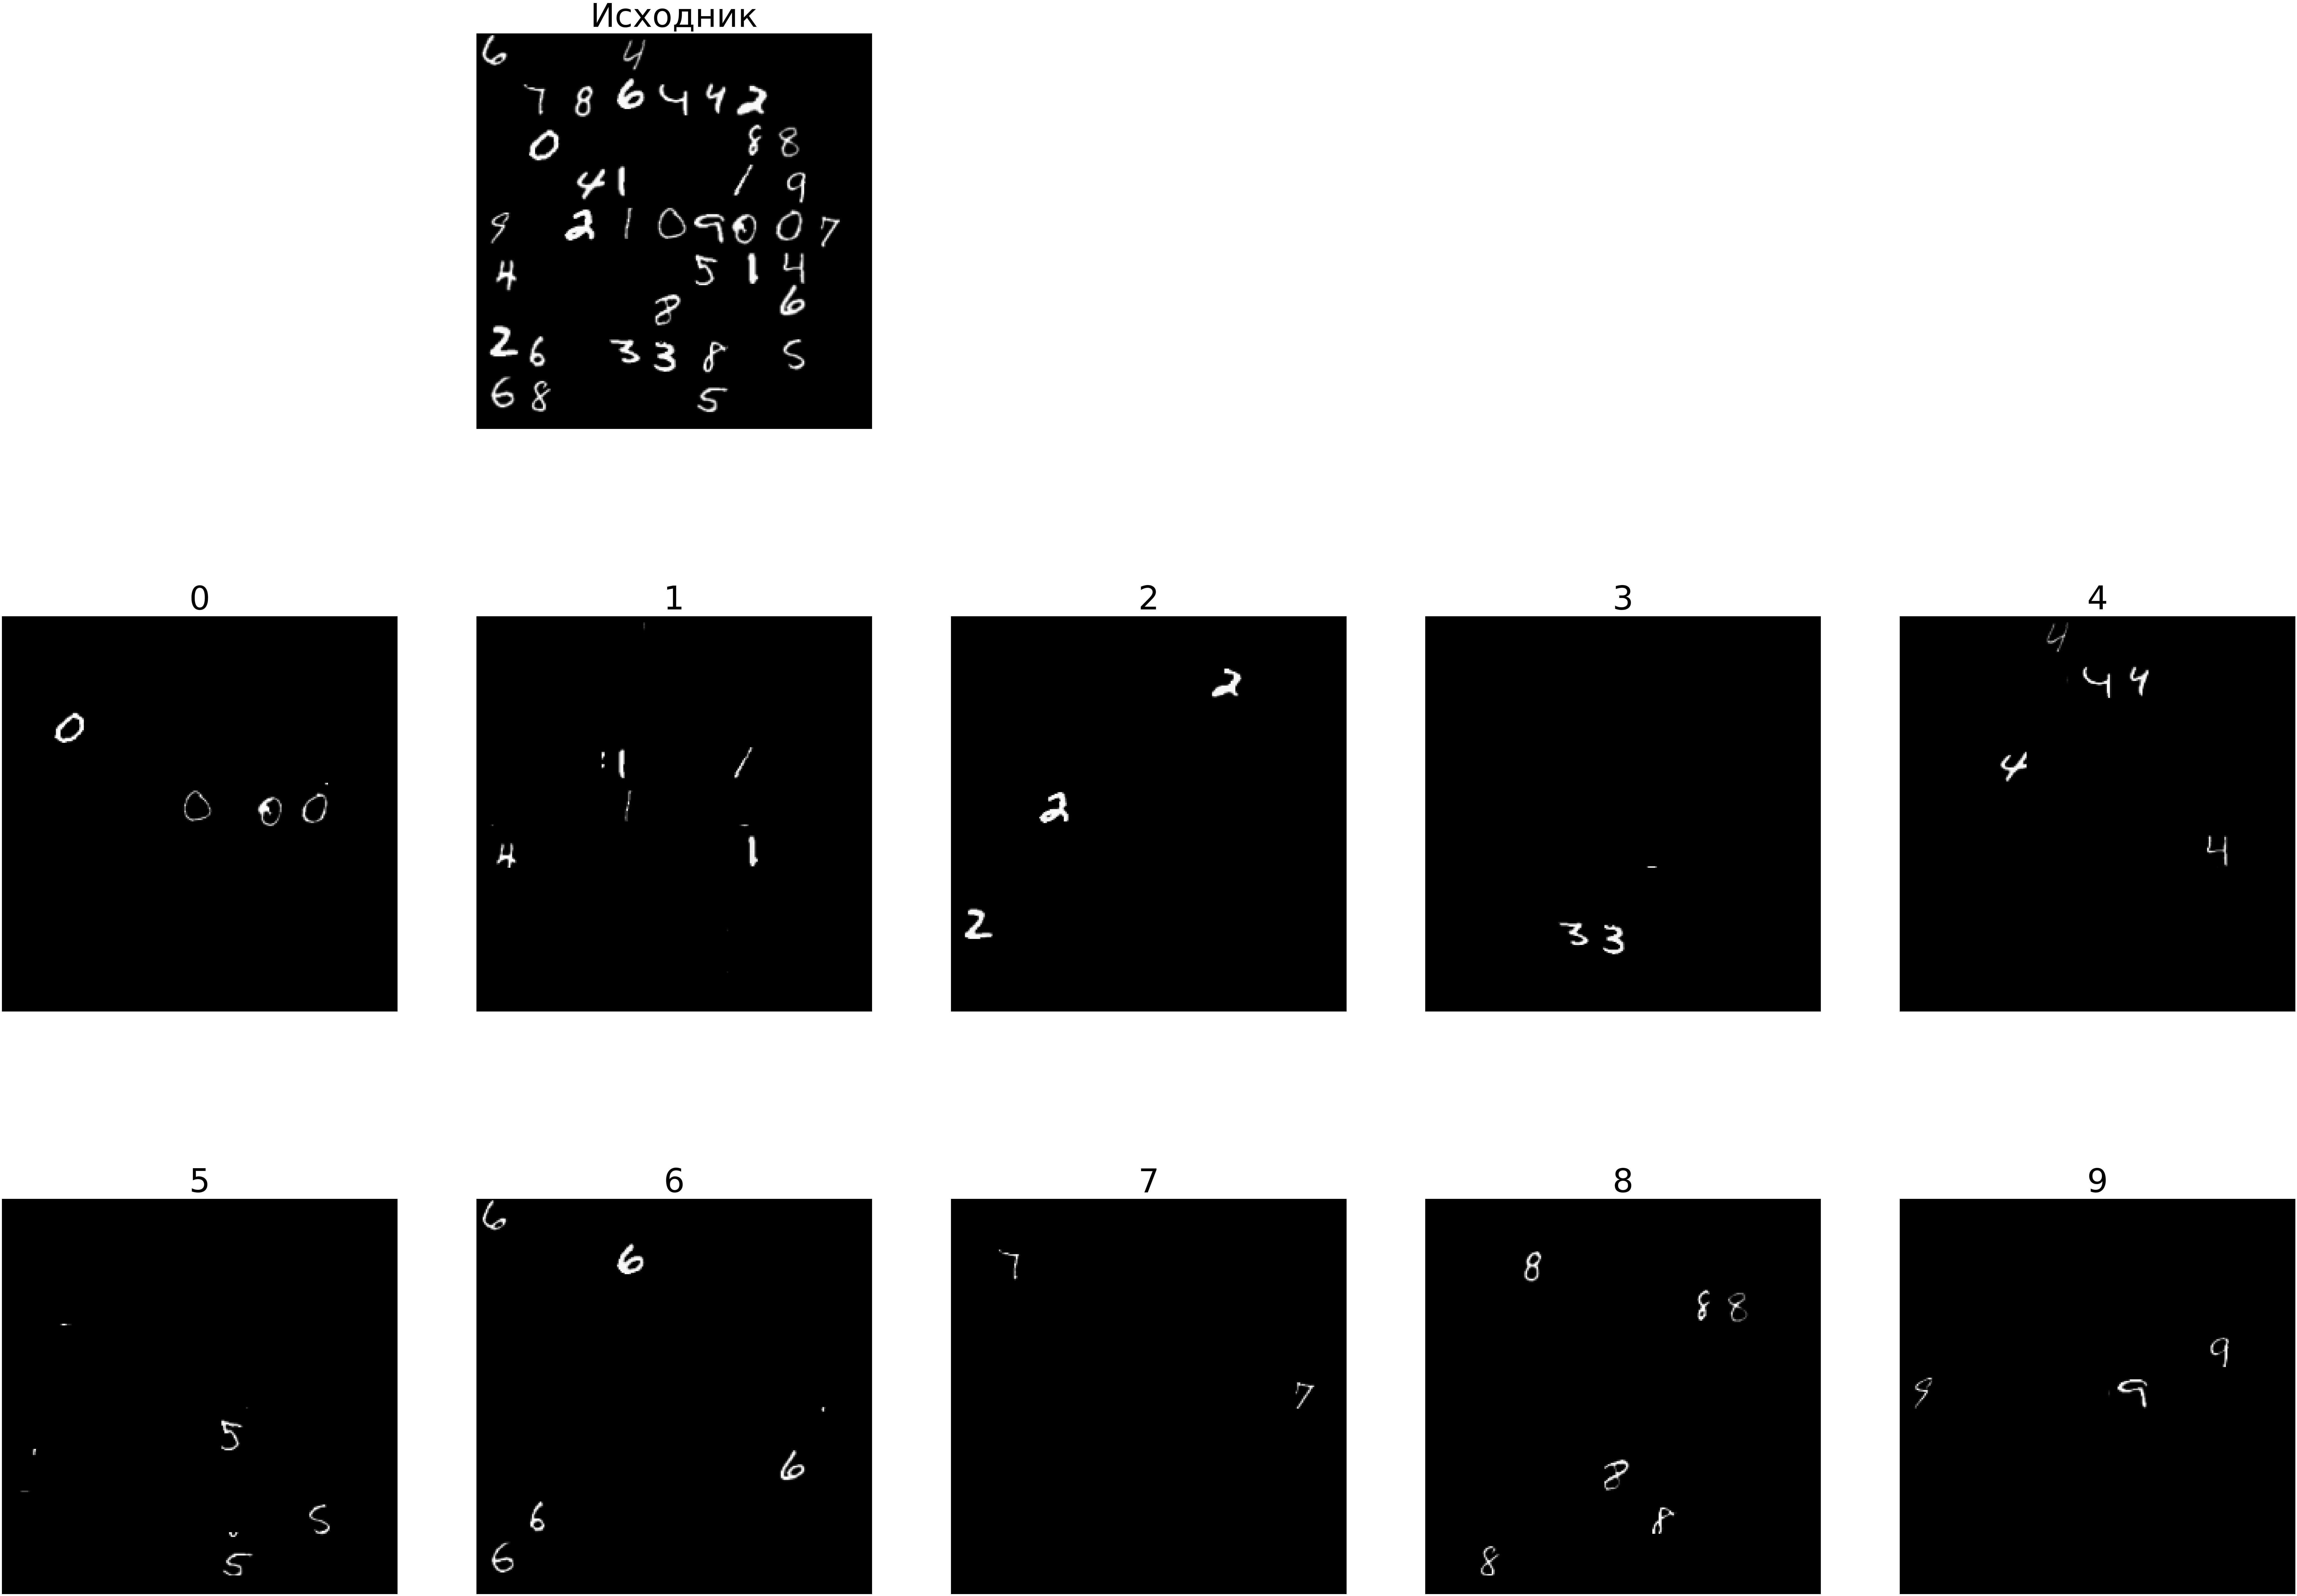

Загрузить изображение?
Сохранить результат как файл...


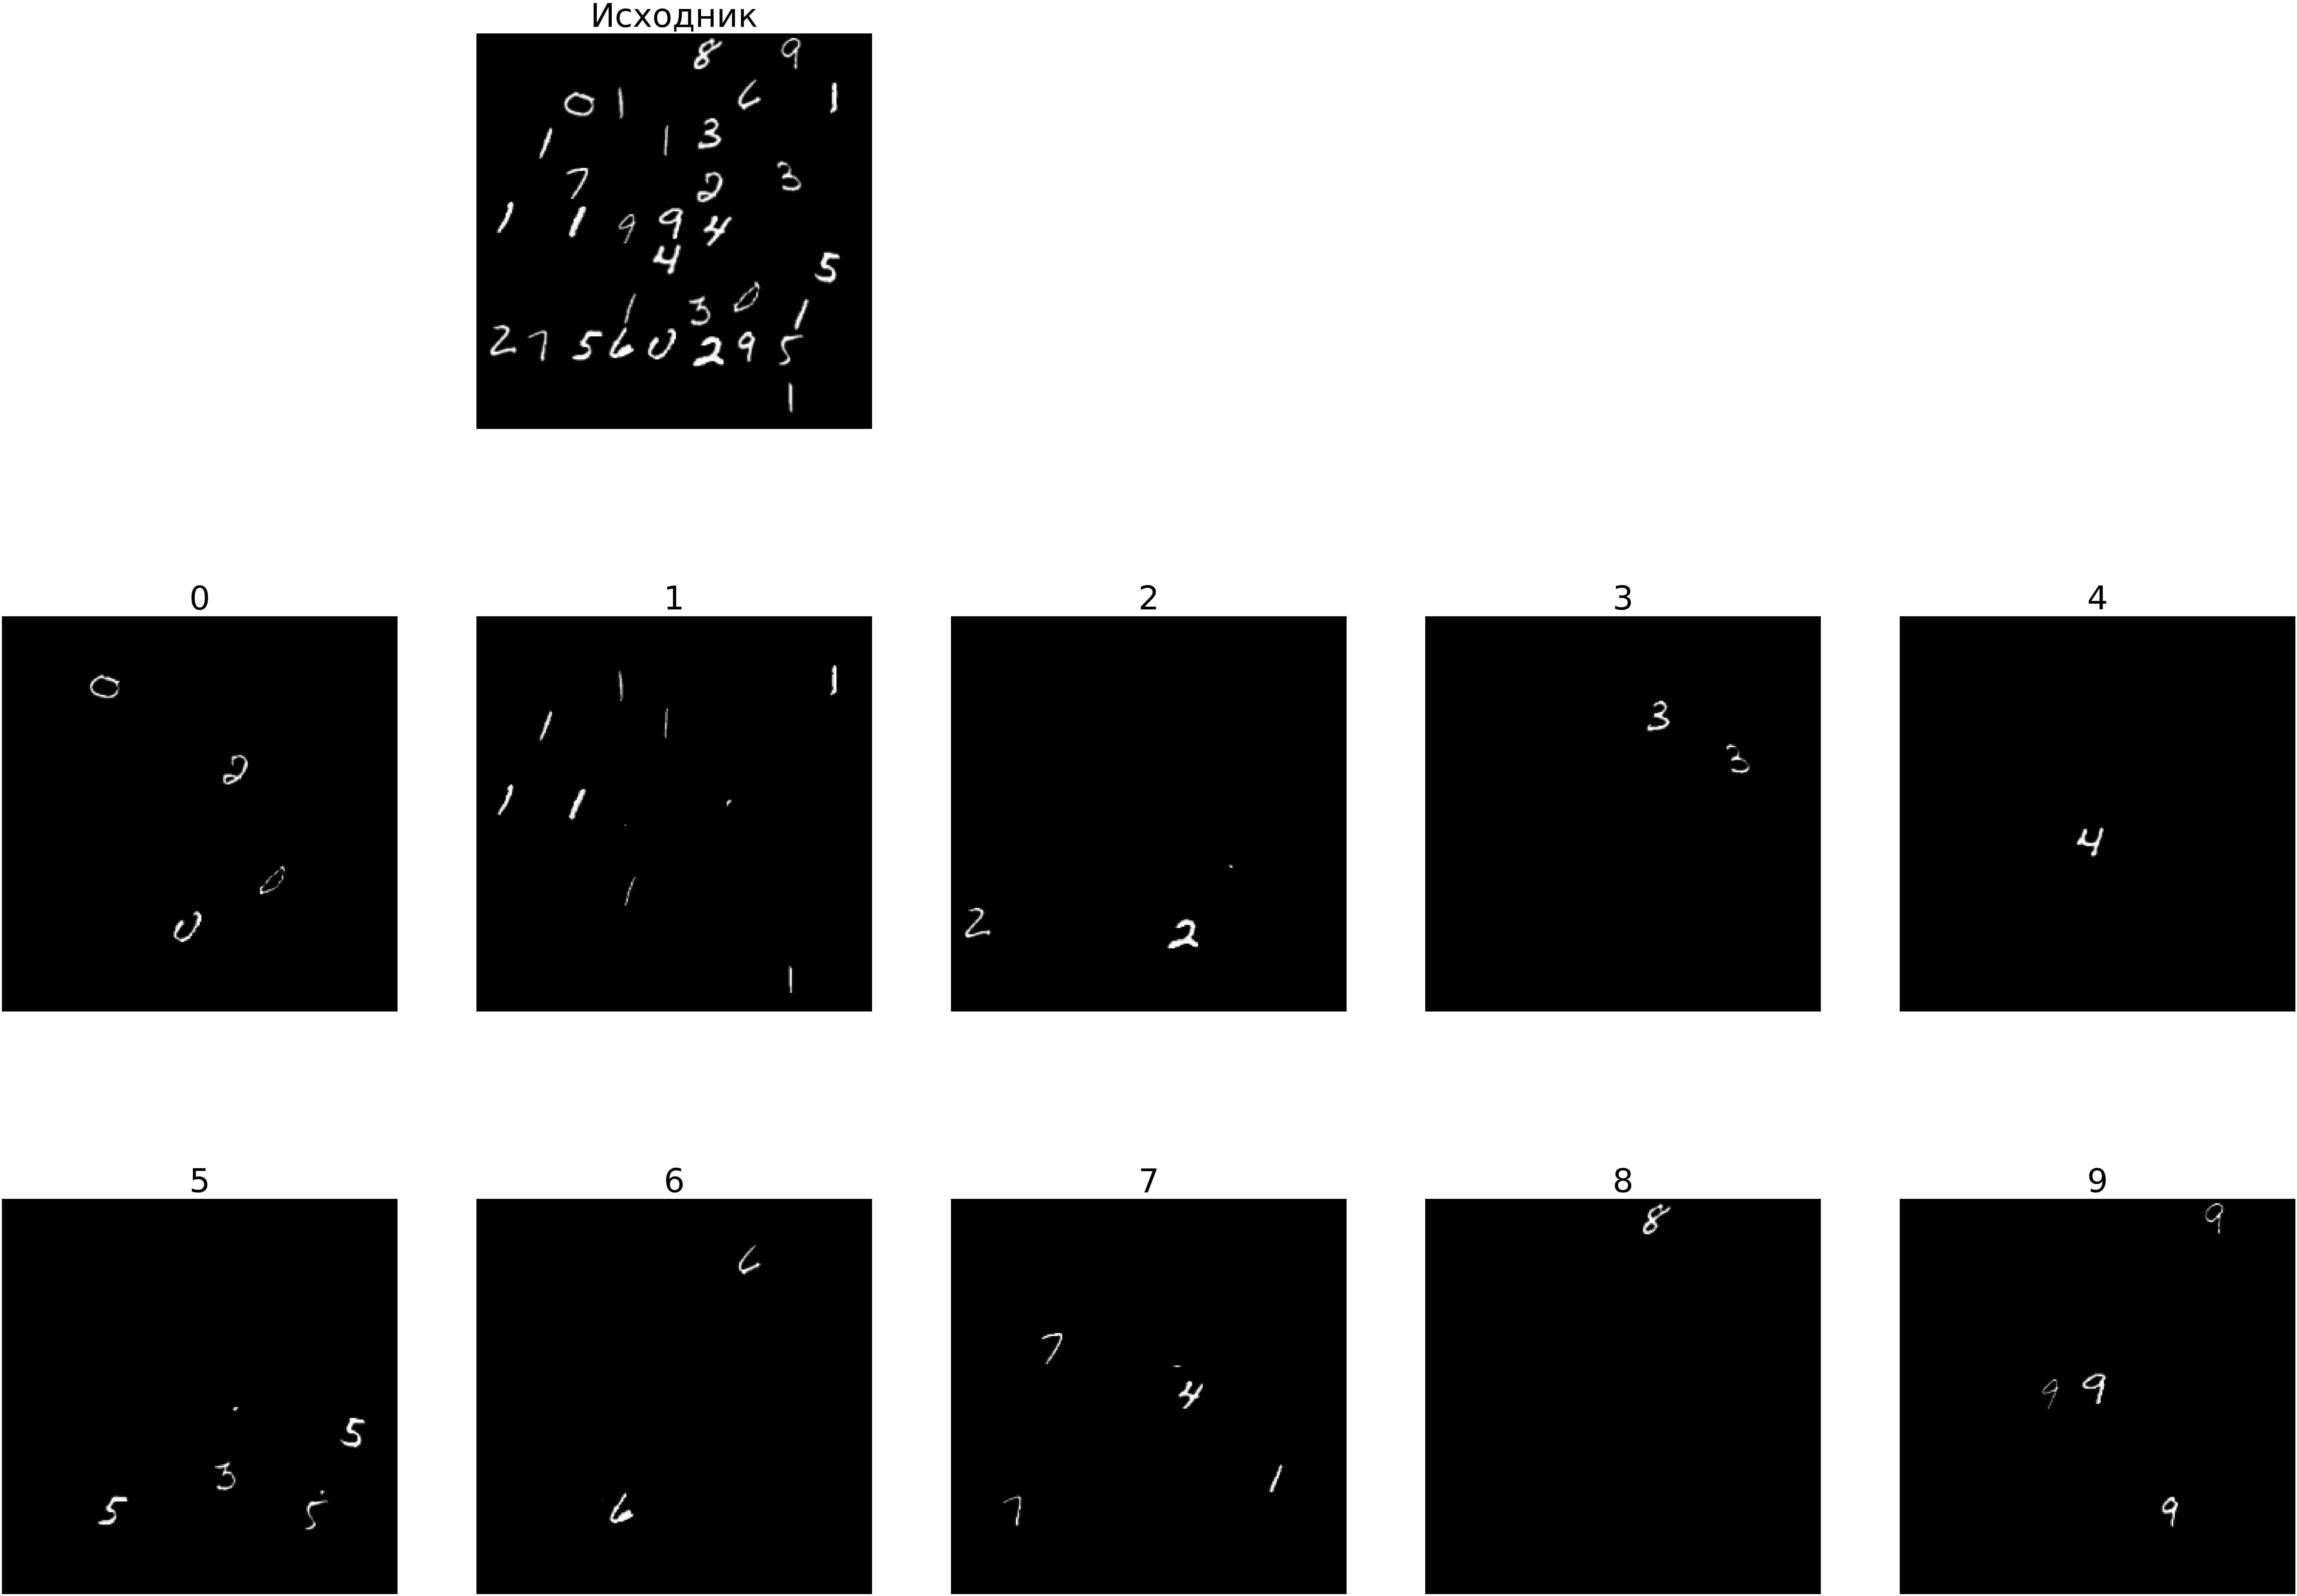

Загрузить изображение?
Сохранить результат как файл...


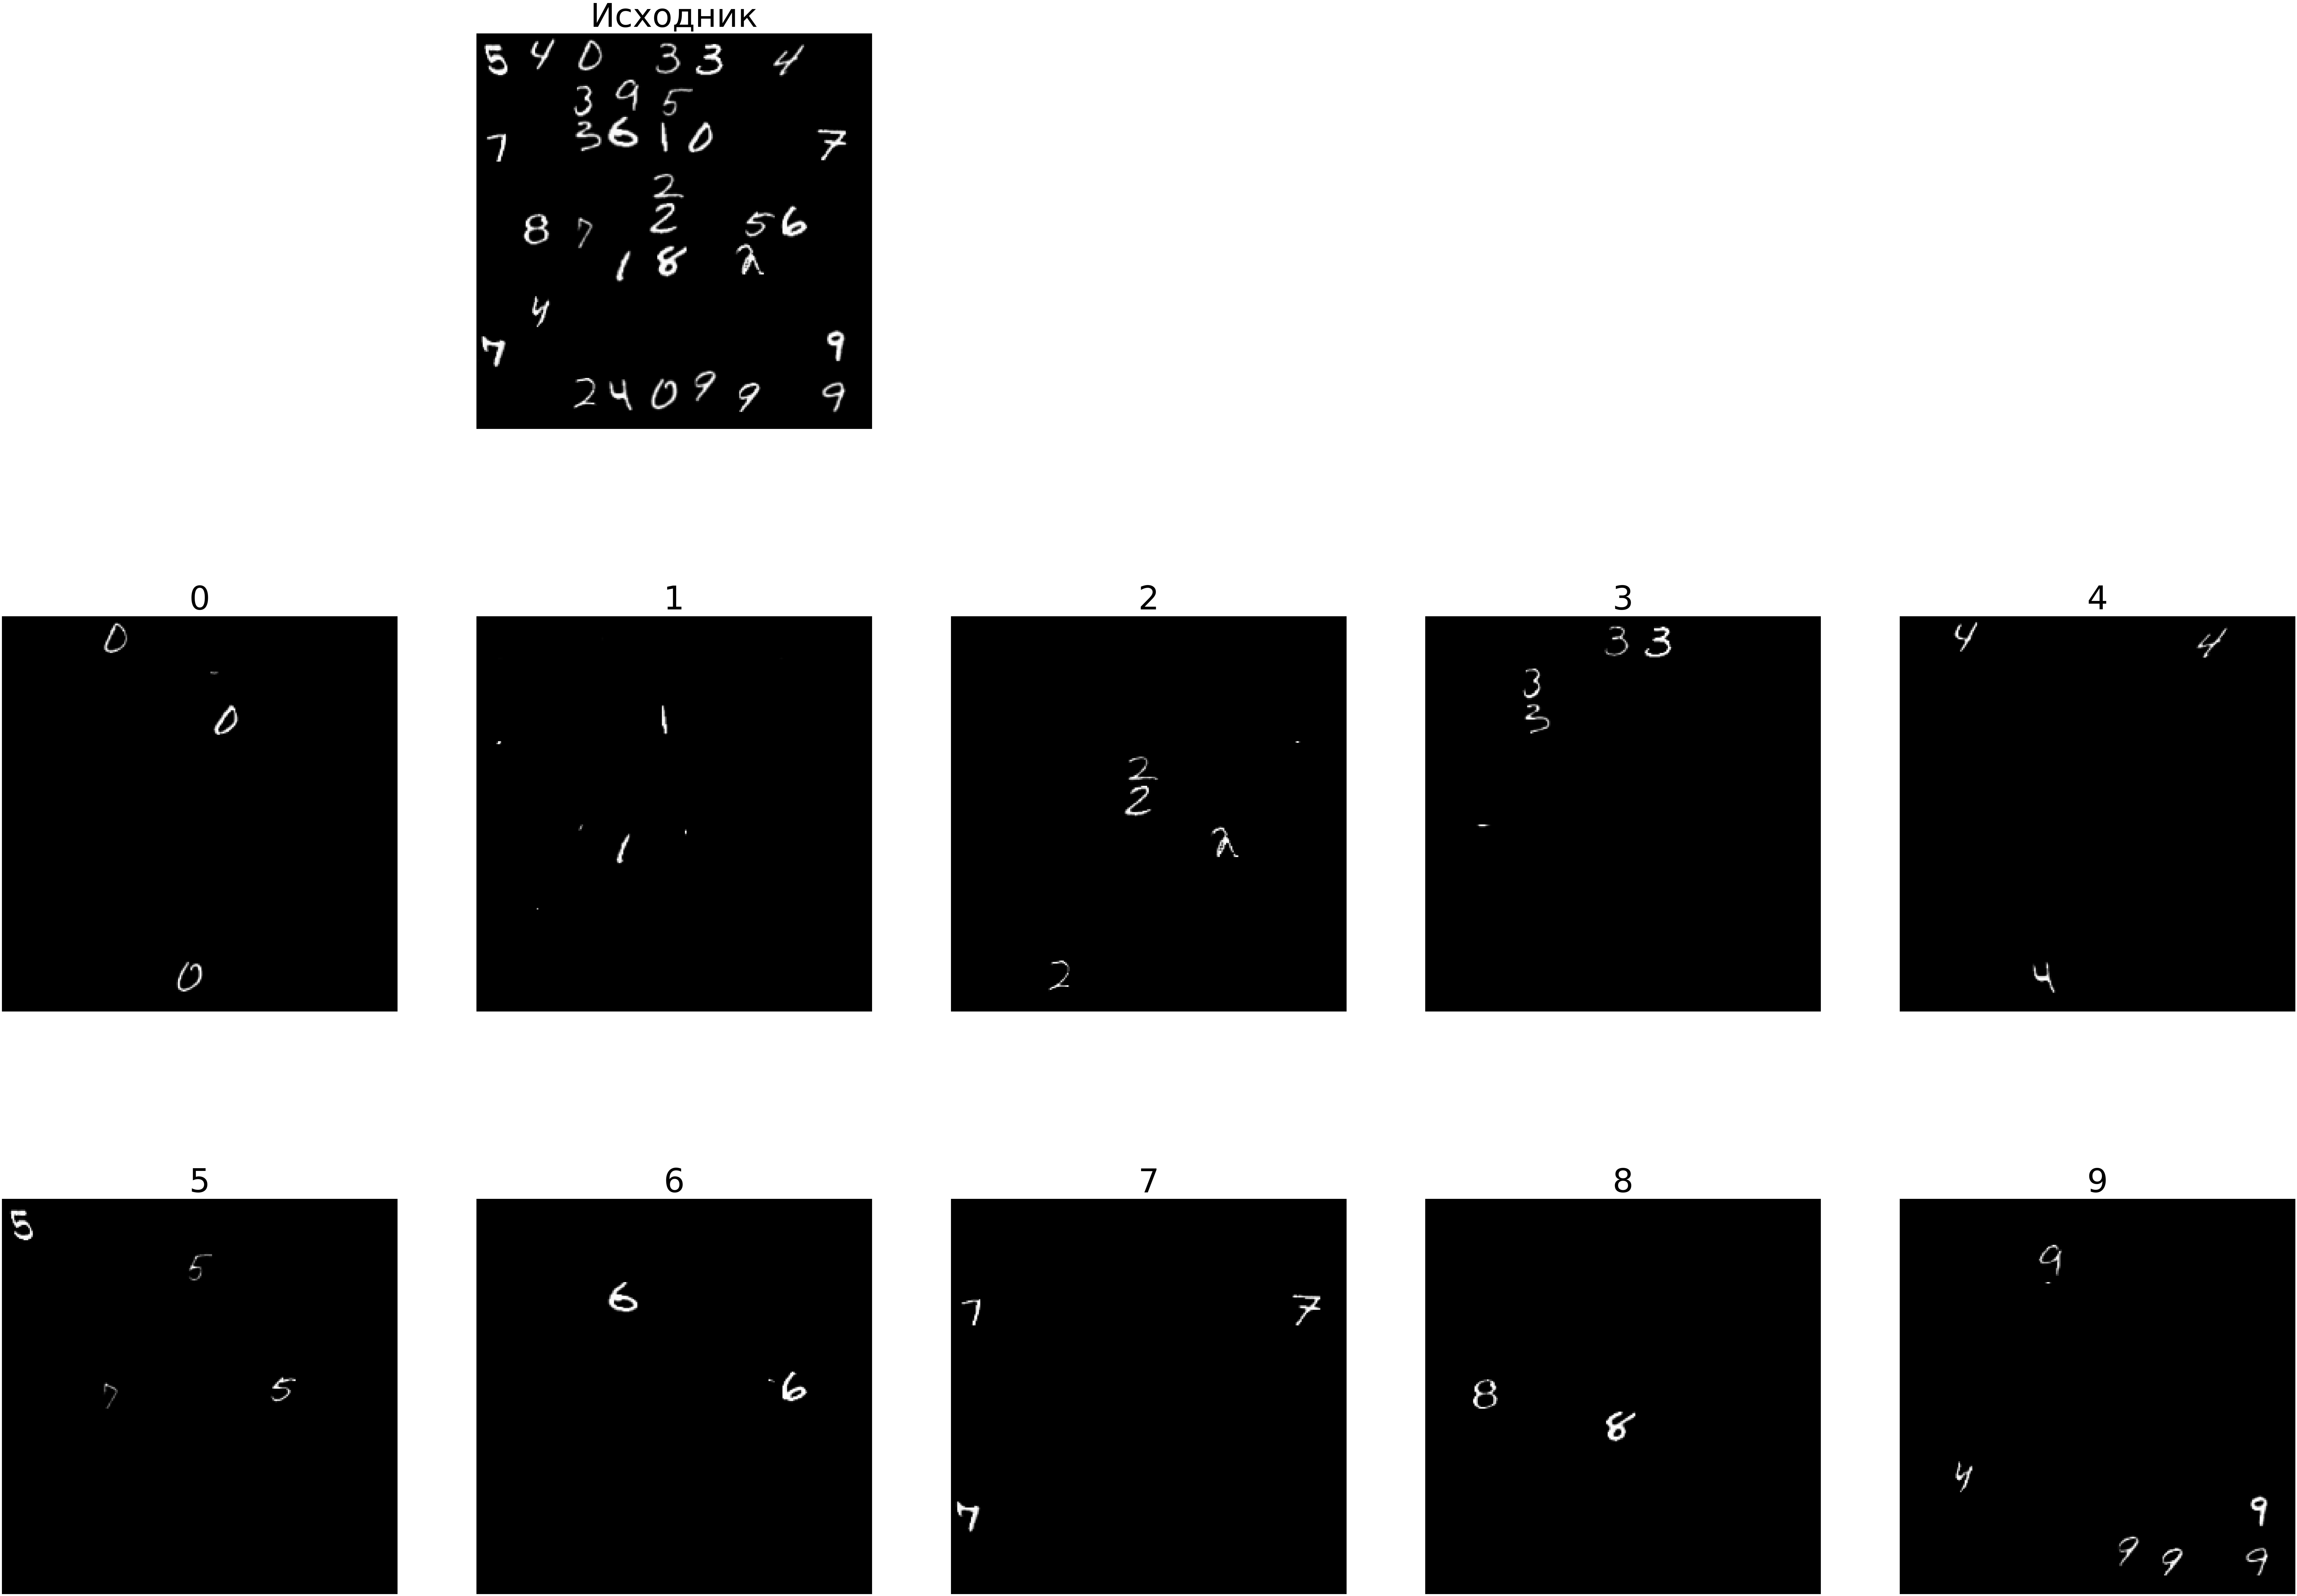

Загрузить изображение?
Сохранить результат как файл...


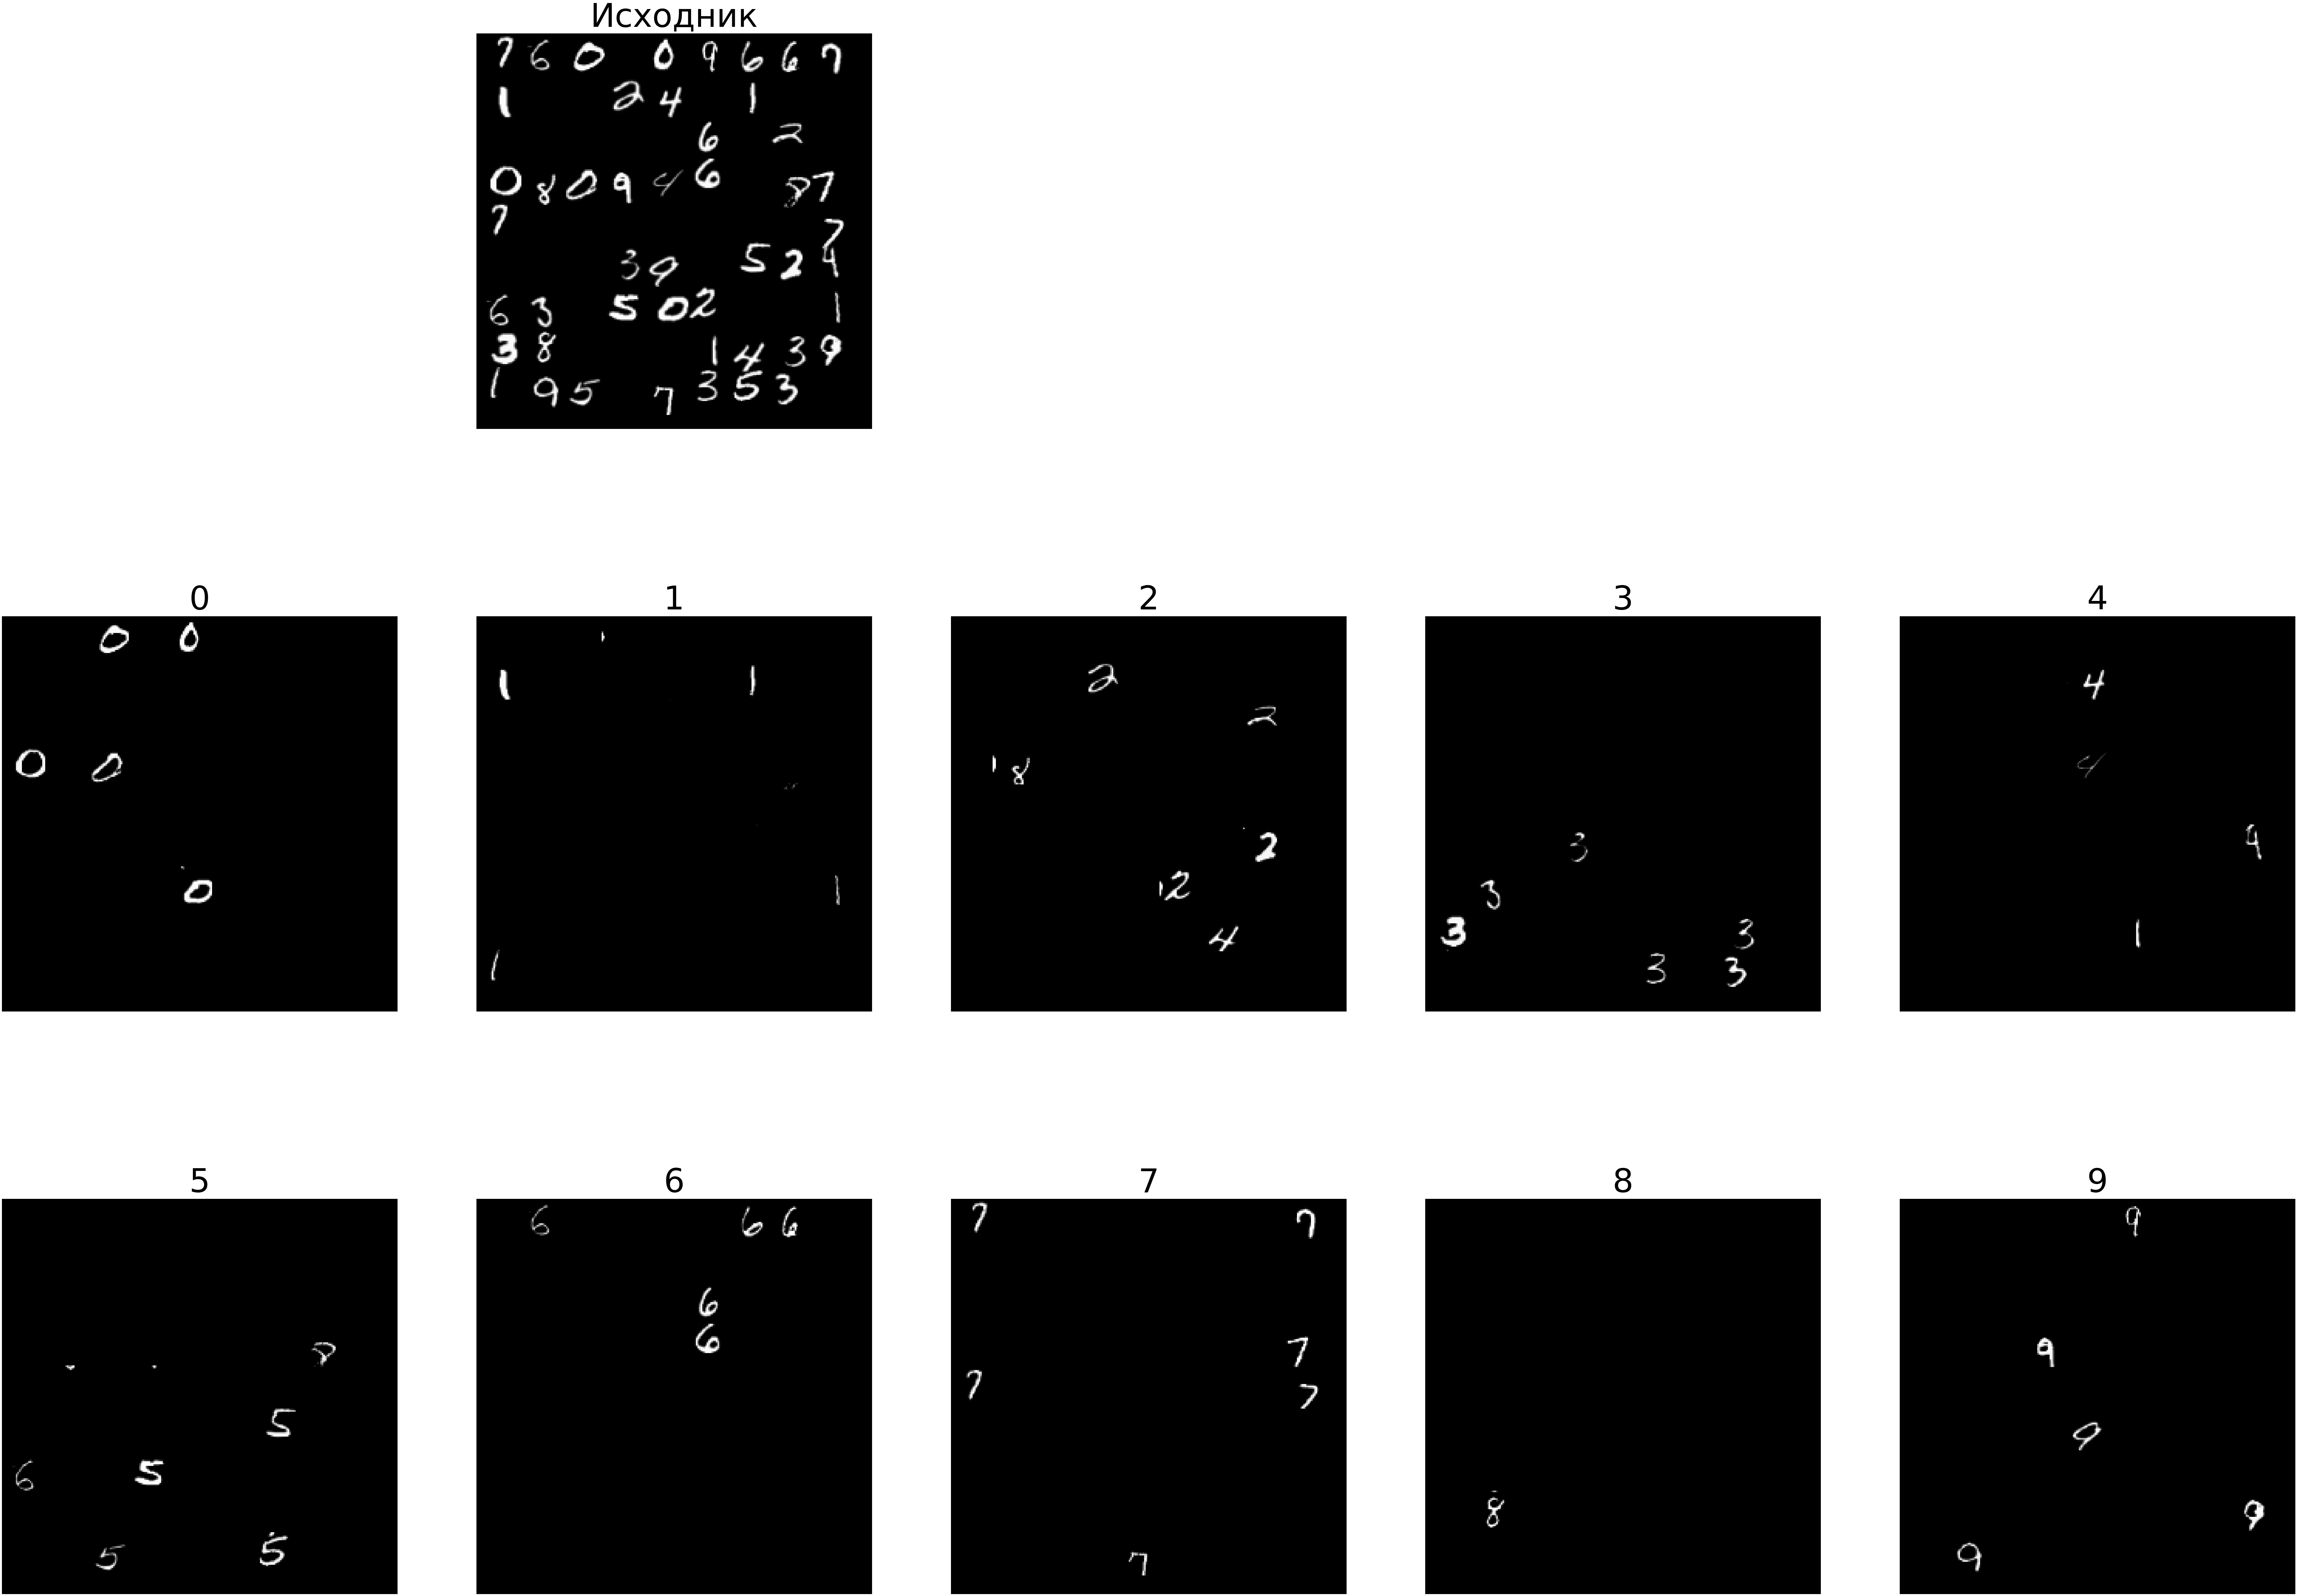

In [ ]:
for i in "123456789":
  working(i)

Загрузить изображение?
yes
Введите файл загрузки
pixil-frame-0
Сохранить результат как файл...
v1


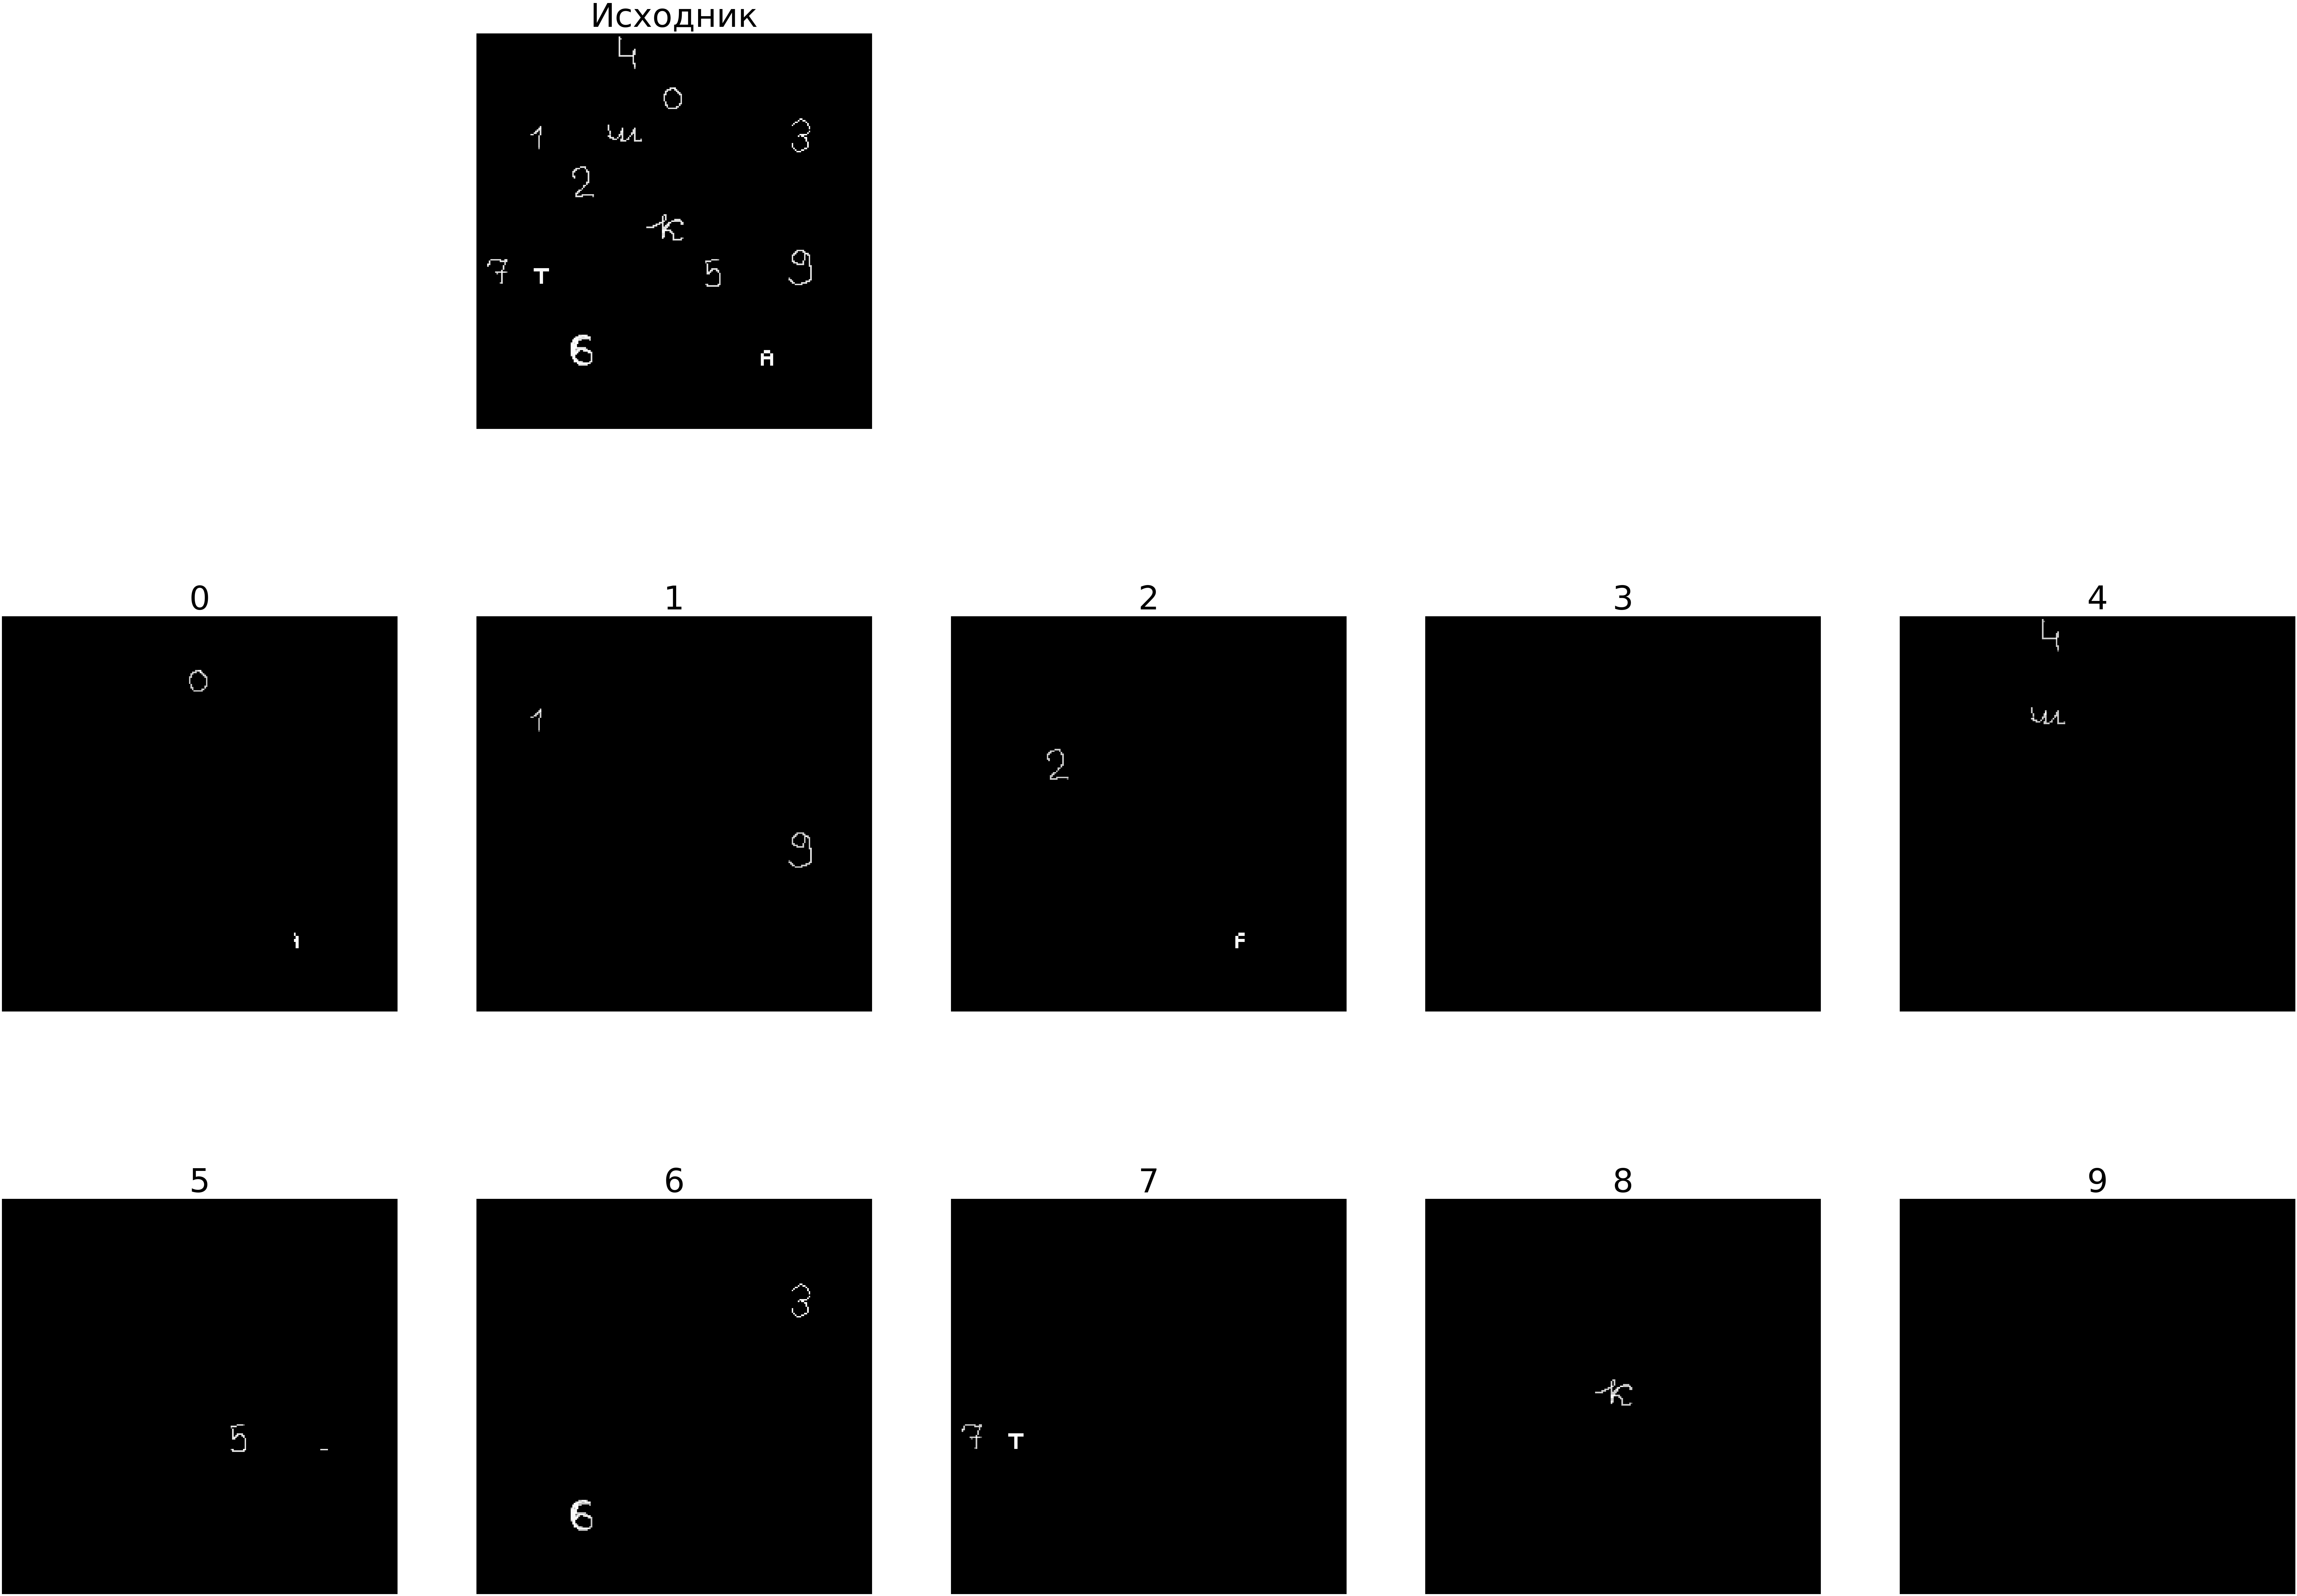

In [ ]:
working()


In [ ]:
model = keras.models.load_model('model.h5')

In [ ]:
# Get contours
contours, hierarchy = cv2.findContours(blank_image, cv2.findContours, cv2.CHAIN_APPROX_NONE)

TypeError: ignored

In [ ]:
#cropped = blank_image.crop((0, 0, 28, 28))
cropped=np.asarray(blank_image, dtype='float32')
np.unique(cropped)
cropped=cropped/255.0

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  84.,  85.,  86.,  87.,  88.,  89.,
        91.,  92.,  93.,  94.,  95.,  97.,  98.,  99., 100., 102., 103.,
       104., 105., 107., 108., 109., 111., 112., 113., 115., 116., 117.,
       119., 120., 121., 123., 124., 126., 127., 128., 130., 131., 133.,
       134., 136., 137., 139., 140., 142., 143., 145., 146., 148., 149.,
       151., 152., 154., 155., 157., 158., 160., 162., 163., 165., 166.,
       168., 170., 171., 173., 175., 176., 178., 18